#  Series temporales. Modelos de Suavizado exponencial y ARIMA

En este documento exploramos distintos modelos de suavizado y ARIMA para series univariantes. Este código servirá para los días 5 y 6 ya que resulta cómodo e ilustrativo aplicar todos los métodos a cada conjunto de datos y poder comparar los resultados. 

La idea será buscar los mejores modelos para la predicción de series temporales para los datos que nos lleguen.

# Series temporales I. Suavizado

En esta primera sesión vamos a explorar los métodos de inspección descriptiva de una serie temporal y, posteriormente, los primeros modelos predictivos basados en suavizado exponencial. 

El esquema de trabajo será: 

1. Leer valores de la serie y convertir a formato legible por python
2. Representar la serie para intuir componentes presentes
3. Descomposición de la serie y contraste de estacionariedad
4. Creación de partición en ventanas training/test
5. Aplicación de modelos de suavizado y evaluación de ajuste

Con esto tendremos una primera aproximación para la predicción de datos a futuro en una serie temporal univariante.


In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [82]:
# Lectura de datos
paro = pd.read_excel('C:\\Users\\Guille\\Documents\\MineriaDatos_2022_23\\Datos\\Paro.xlsx')
paro.head()


Total Nacional  01 Andalucía  02 Aragón  \
0  2002T1           11.55         18.95       5.42   
1  2002T2           11.15         18.62       5.86   
2  2002T3           11.49         20.26       5.57   
3  2002T4           11.61         20.15       6.54   
4  2003T1           11.99         19.00       7.38   

   03 Asturias, Principado de  04 Balears, Illes  05 Canarias  06 Cantabria  \
0                        9.15               8.96        10.57          9.54   
1                       10.28               6.74        11.33          9.73   
2                        9.67               6.07        11.11         10.25   
3                       10.12               8.69        11.32         10.58   
4                       12.44              12.68        10.69         10.07   

   07 Castilla y León  08 Castilla - La Mancha  ...  10 Comunitat Valenciana  \
0               10.83                     9.72  ...                    10.07   
1               10.65                     9.35  ...                    11.19   
2               10.23                     9.17  ...                    11.29   
3               10.15                     9.85  ...                    10.71   
4               11.39                    10.93  ...                    11.60   

   11 Extremadura  12 Galicia  13 Madrid, Comunidad de  14 Murcia, Región de  \
0           19.79       13.39                     7.49                 12.15   
1           18.38       12.05                     6.96                 11.15   
2           19.09       11.26                     7.75                 10.43   
3           18.91       11.89                     6.99                 11.45   
4           19.55       12.87                     7.77                 12.04   

   15 Navarra, Comunidad Foral de  16 País Vasco  17 Rioja, La  18 Ceuta  \
0                            6.03           9.56          7.05      7.01   
1                            5.15           9.19          7.76      7.66   
2                            6.58           9.85          7.74      7.73   
3                            5.58           9.64          5.65      5.70   
4                            5.69           9.61          6.46      9.47   

   19 Melilla  
0       10.30  
1        0.41  
2        2.60  
3        3.57  
4        1.95  

[5 rows x 21 columns]

Como es una serie trimestral, tenemos que generar correctamente la variable de tiempo. Para ello utilizamos date_range con frec ='Q'. Tenemos que fijar el inicio y la cantidad de valores a generar. Como vemos empieza en 2002 y el número de fechas a generar será el número de filas del dataset.

In [83]:

dates = pd.date_range(start='2002', periods=paro.shape[0], freq='Q')
dates

DatetimeIndex(['2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
      

Check! 



Convertimos a serie temporal para que python entienda con una simple asignación de la variable de fecha 'Month' en formato datetime por si acaso. 



In [84]:
# Convertir en serie temporal
paro.set_index(dates,inplace=True)


A ver cuál es el aspecto.. 



In [85]:
paro = paro.drop([' '],axis=1)
paro


Total Nacional  01 Andalucía  02 Aragón  \
2002-03-31           11.55         18.95       5.42   
2002-06-30           11.15         18.62       5.86   
2002-09-30           11.49         20.26       5.57   
2002-12-31           11.61         20.15       6.54   
2003-03-31           11.99         19.00       7.38   
...                    ...           ...        ...   
2018-09-30           14.55         22.85       9.87   
2018-12-31           14.45         21.26      11.11   
2019-03-31           14.70         21.08      10.50   
2019-06-30           14.02         21.04       9.98   
2019-09-30           13.92         21.83       9.69   

            03 Asturias, Principado de  04 Balears, Illes  05 Canarias  \
2002-03-31                        9.15               8.96        10.57   
2002-06-30                       10.28               6.74        11.33   
2002-09-30                        9.67               6.07        11.11   
2002-12-31                       10.12               8.69        11.32   
2003-03-31                       12.44              12.68        10.69   
...                                ...                ...          ...   
2018-09-30                       13.45               7.16        19.64   
2018-12-31                       12.86              10.91        19.99   
2019-03-31                       15.03              17.06        21.03   
2019-06-30                       14.17              12.13        21.00   
2019-09-30                       14.43               8.18        21.19   

            06 Cantabria  07 Castilla y León  08 Castilla - La Mancha  \
2002-03-31          9.54               10.83                     9.72   
2002-06-30          9.73               10.65                     9.35   
2002-09-30         10.25               10.23                     9.17   
2002-12-31         10.58               10.15                     9.85   
2003-03-31         10.07               11.39                    10.93   
...                  ...                 ...                      ...   
2018-09-30          8.99               11.30                    16.71   
2018-12-31          9.68               11.21                    16.16   
2019-03-31         12.20               12.42                    15.74   
2019-06-30          9.01               11.76                    16.42   
2019-09-30          8.73               11.18                    16.10   

            09 Cataluña  10 Comunitat Valenciana  11 Extremadura  12 Galicia  \
2002-03-31        10.76                    10.07           19.79       13.39   
2002-06-30         9.53                    11.19           18.38       12.05   
2002-09-30         9.78                    11.29           19.09       11.26   
2002-12-31        10.61                    10.71           18.91       11.89   
2003-03-31        10.74                    11.60           19.55       12.87   
...                 ...                      ...             ...         ...   
2018-09-30        10.63                    15.29           21.68       12.24   
2018-12-31        11.75                    14.30           23.10       12.04   
2019-03-31        11.64                    14.11           22.52       12.47   
2019-06-30        11.17                    14.30           20.46       11.33   
2019-09-30        10.87                    13.91           19.68       11.49   

            13 Madrid, Comunidad de  14 Murcia, Región de  \
2002-03-31                     7.49                 12.15   
2002-06-30                     6.96                 11.15   
2002-09-30                     7.75                 10.43   
2002-12-31                     6.99                 11.45   
2003-03-31                     7.77                 12.04   
...                             ...                   ...   
2018-09-30                    11.86                 16.33   
2018-12-31                    11.54                 15.83   
2019-03-31                    11.70                 15.12   
2019-06-30    

Ya tenemos la serie preparada para analizar. En primer luegar haremos un estudio descriptivo, pintar, descomponer, entender las componentes y tal vez echar un vistazo a los correlogramas y tests de estacionariedad para los residuos de la descomposición "inocente" con la simple extracción de componentes. 

## Estudio descriptivo

Aquí opción gráfica para que los plot() salgan grandes. 


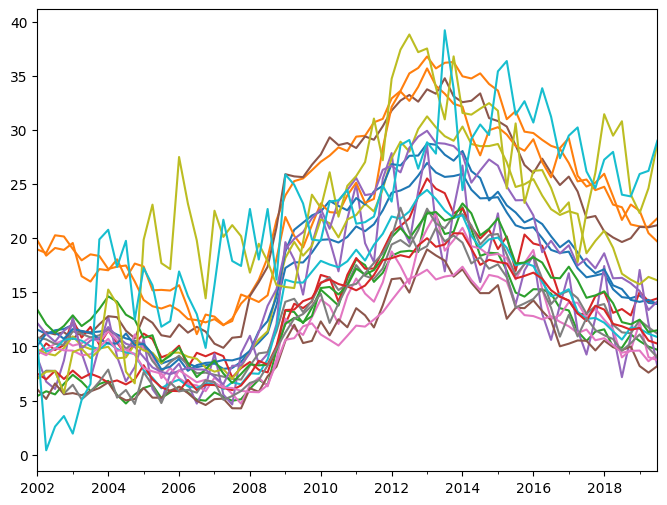

In [87]:
plt.rcParams["figure.figsize"] = (8,6)
paro.plot(legend=False)
plt.show()

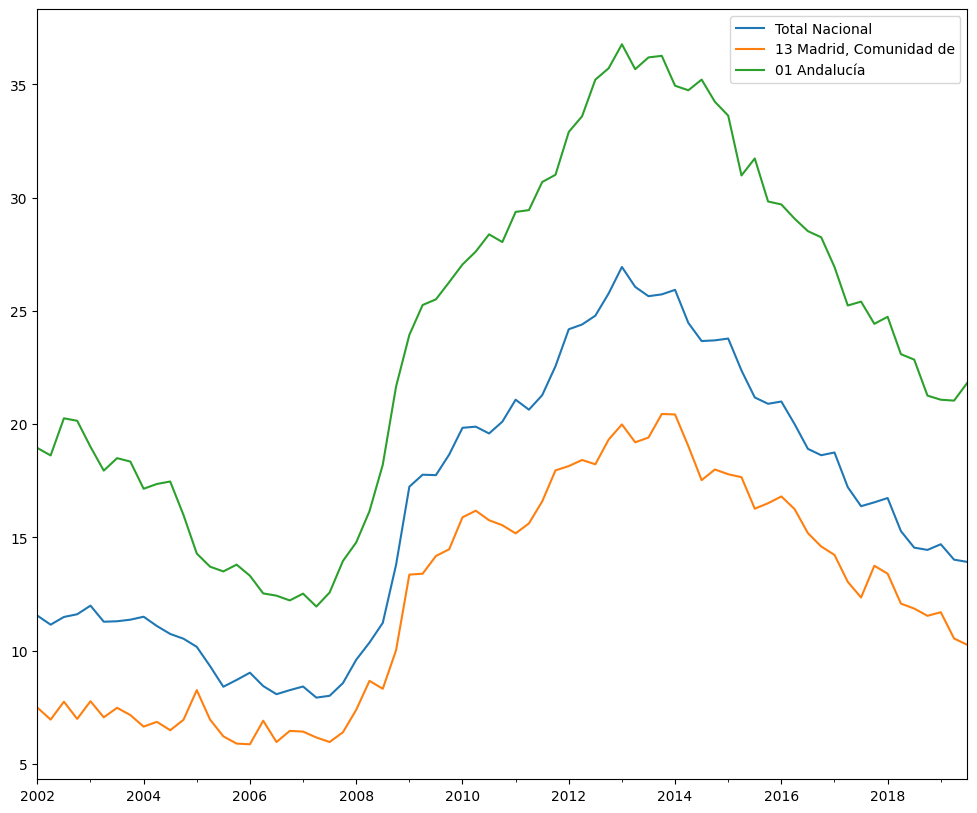

In [88]:
plt.rcParams["figure.figsize"] = (12,10)
paro[['Total Nacional','13 Madrid, Comunidad de','01 Andalucía']].plot()
plt.show()


Podemos definir una función que calcule el test de Dickey Fuller para la estacionariedad de la serie. De esta forma, en cualquier momento, introduciendo el vector de valores de la serie, obtendremos el contraste de hipótesis. 

H0: La serie NO es estacionaria
H1: La serie no es estacionaria

Por tanto, nos interesará que el contraste de hipótesis sea rechazado (p-valor < 0.05). 


In [89]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


Probamos con la serie al natural. 



In [90]:
test_stationarity(paro['Total Nacional'])



Results of Dickey-Fuller Test:
Test Statistic                 -2.803854
p-value                         0.057725
#Lags Used                     12.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


### Descomposición de la serie

En base a la descomposición descriptiva por medias móviles, se extraen las componentes de tendencia y estacionalidad.

**Descomposición aditiva** 


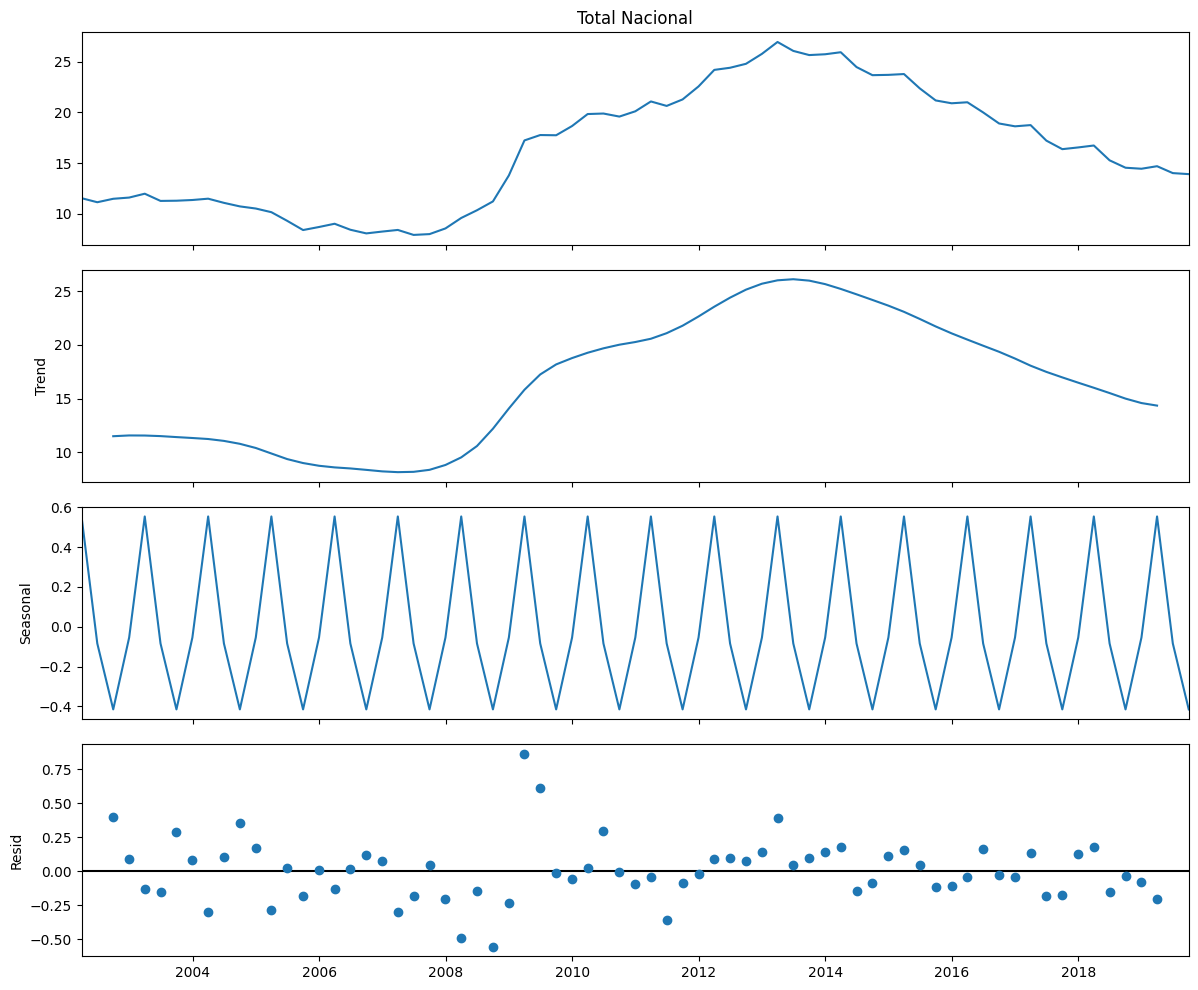

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva
paro_desc_Ad = seasonal_decompose(paro['Total Nacional'], model='additive',period=4)
paro_desc_Ad.plot()
plt.show()


Evaluamos estacionariedad de los residuos de la descomposición aditiva. Aquí, debido a que la tendencia se calcula por medias móviles, los primeros y últimos valores de la serie son NA, no se calculan. Simplemente saber esto y tener en cuenta solamente los residuos válidos. 



In [92]:
test_stationarity(paro_desc_Ad.resid.dropna())



Results of Dickey-Fuller Test:
Test Statistic                -6.683929e+00
p-value                        4.273140e-09
#Lags Used                     1.000000e+00
Number of Observations Used    6.500000e+01
Critical Value (1%)           -3.535217e+00
Critical Value (5%)           -2.907154e+00
Critical Value (10%)          -2.591103e+00
dtype: float64


**Descomposición multiplicativa** 



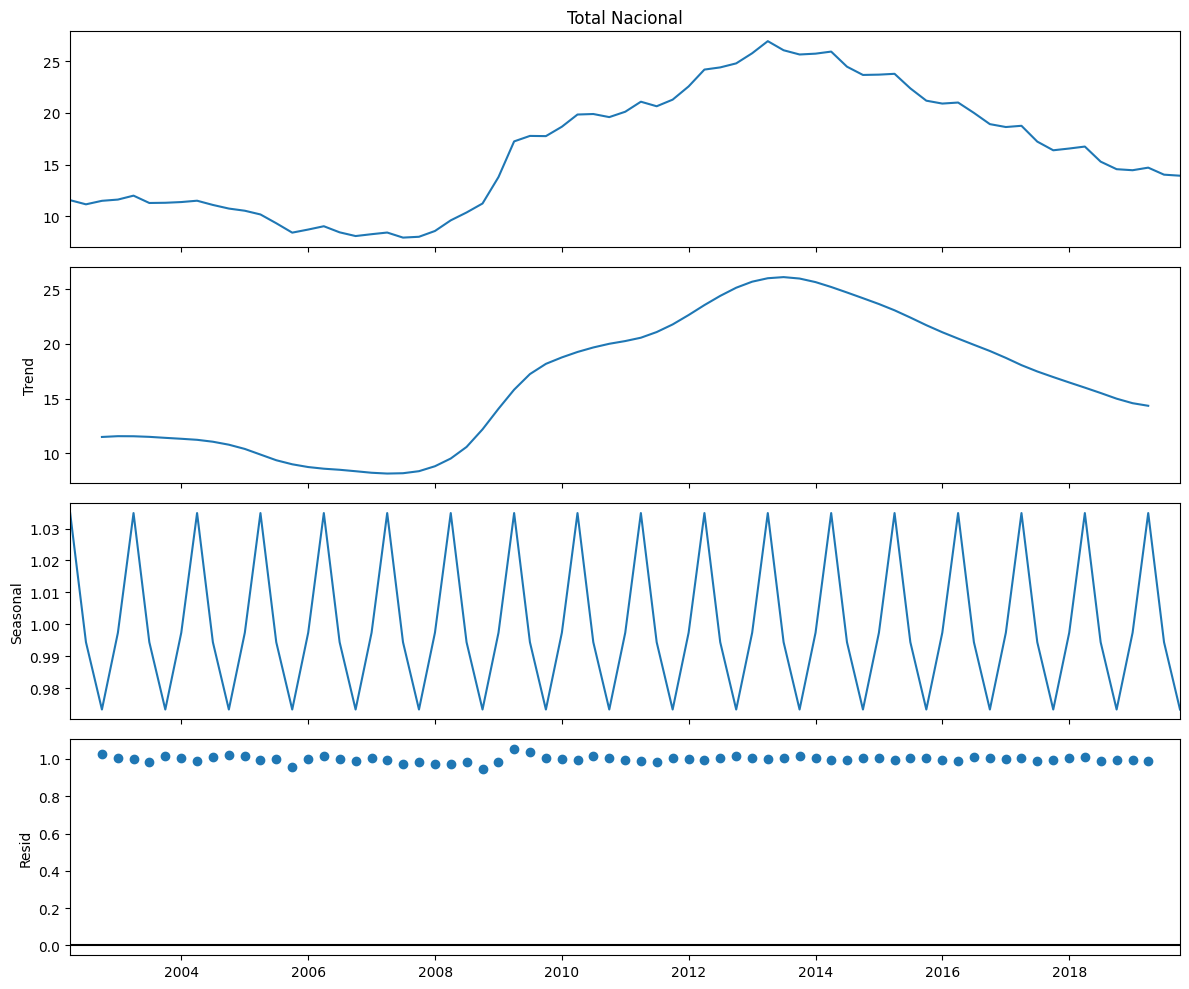

In [93]:
# Aplicar descomposición aditiva
paro_desc_Mul = seasonal_decompose(paro['Total Nacional'], model='multiplicative',period=4)
paro_desc_Mul.plot()
plt.show()


Evaluamos estacionariedad de los residuos de la descomposición Multiplicativa. 



In [94]:
test_stationarity(paro_desc_Mul.resid.dropna())



Results of Dickey-Fuller Test:
Test Statistic                -5.933561e+00
p-value                        2.349575e-07
#Lags Used                     1.000000e+00
Number of Observations Used    6.500000e+01
Critical Value (1%)           -3.535217e+00
Critical Value (5%)           -2.907154e+00
Critical Value (10%)          -2.591103e+00
dtype: float64


In [95]:
def seasonal_plot(df, season='year', index='month', column=None):
    """Makes a seasonal plot of one column of the input dataframe. Considers the first columns by default.
    
    Arguments:
    
    - df (Pandas DataFrame): DataFrame indexed by Datetime (see `parse_dates` parameter when reading a CSV);
    - season (string): the season that you want to considering when doing the plot, e.g., year, month, etc.;
    - index (string): corresponds to the X axis of the plot. You should choose based on the index period that you're using;
    - column (string, optional): the DataFrame column to consider. Picks the first one by default.
    """
    if column == None:
        column = df.columns[0]
        
    piv_index = getattr(df.index, index)
    piv_season = getattr(df.index, season)
    
    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(12,8))


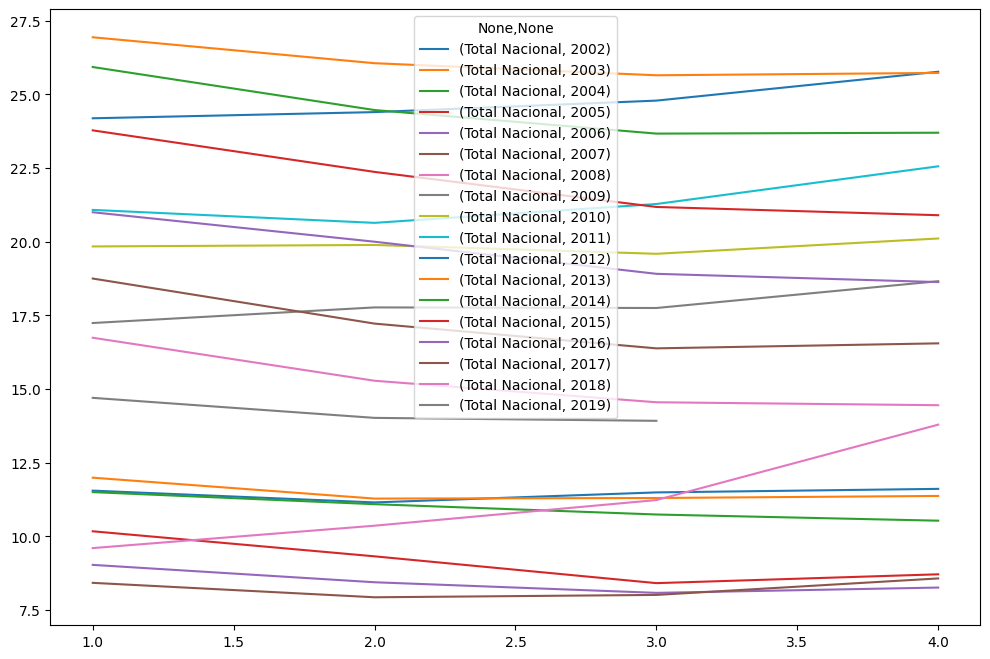

In [96]:
seasonal_plot(paro,index='quarter')
plt.show()


### Hacia la estacionariedad

En esta sección vamos a extraer las componentes identificadas para generar una serie residual y comprobar si es estacionaria una vez eliminados los efectos típicos de las series temporales. 

El esquema es: 

1. Estabilización de la varianza. Transformación Logaritmica
2. Diferenciación regular
3. Diferenciación estacional

Con la serie resultante, comprobaremos estacionariedad y será con la que podemos valorar autocorrelaciones simples y parciales para proponer órdenes ARIMA tentativos par la serie.

#### Estabilización de la varianza. Transformación Logaritmica


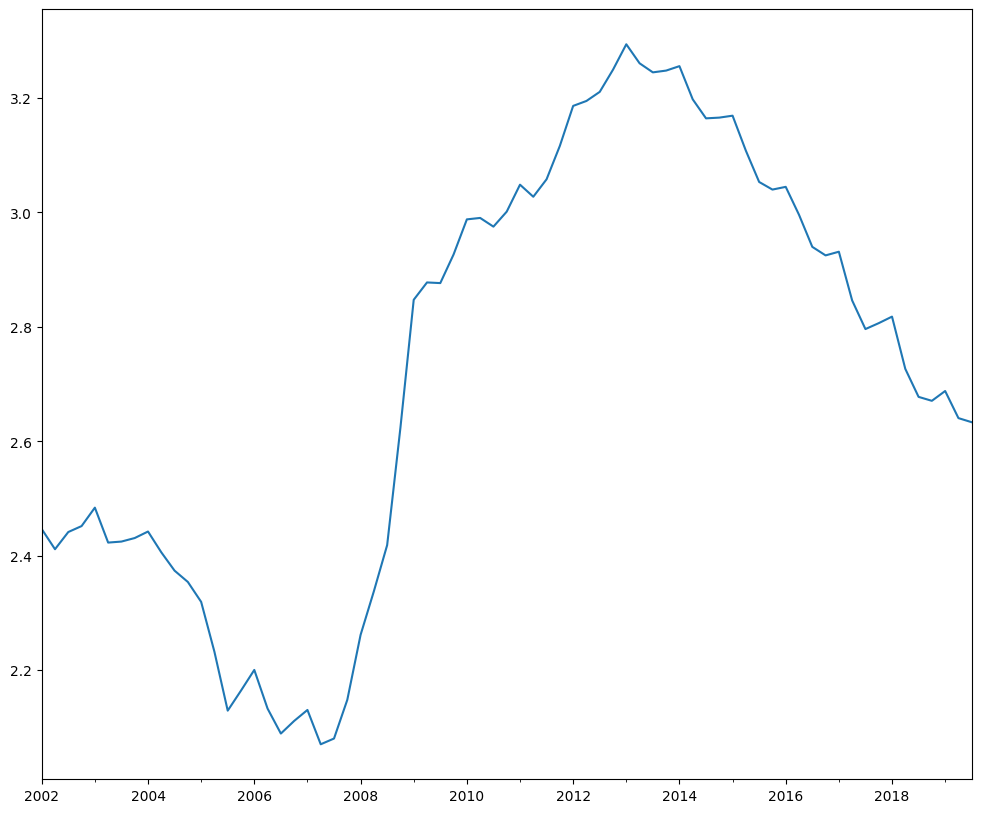

In [97]:
paroLog = np.log(paro['Total Nacional'])
paroLog.plot()
plt.show()


#### Diferenciación regular



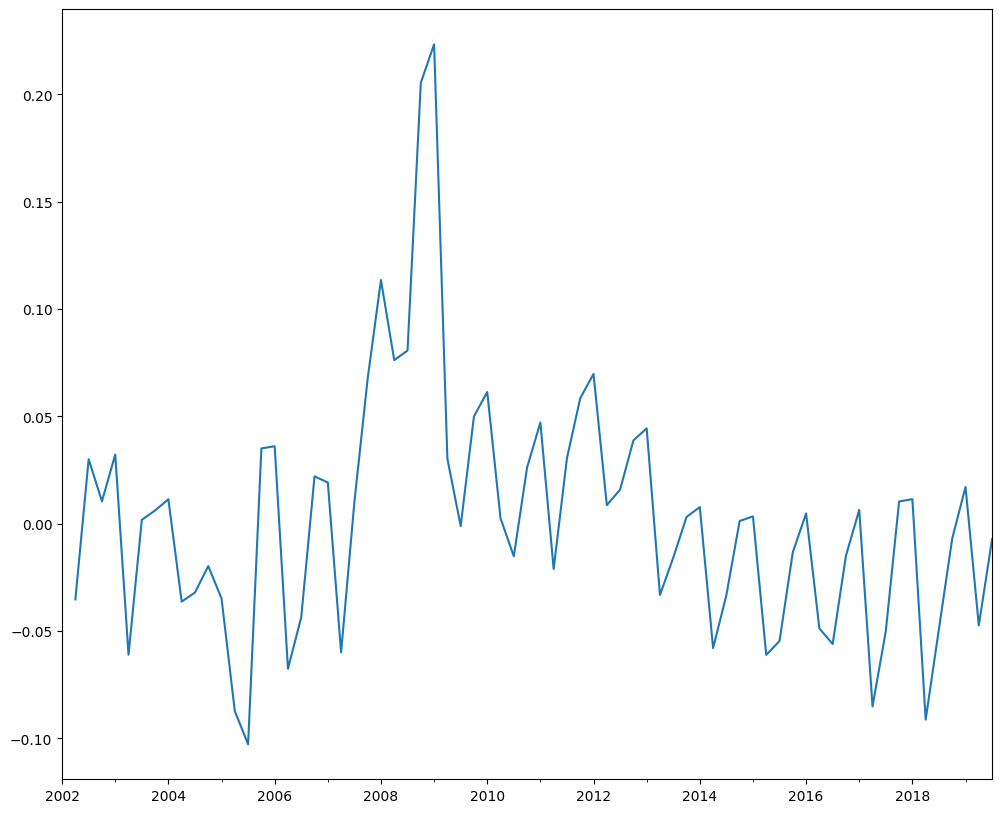

In [98]:
paroLog_diff_1 = paroLog.diff(periods=1)
paroLog_diff_1.plot()
plt.show()


#### Diferenciación estacional



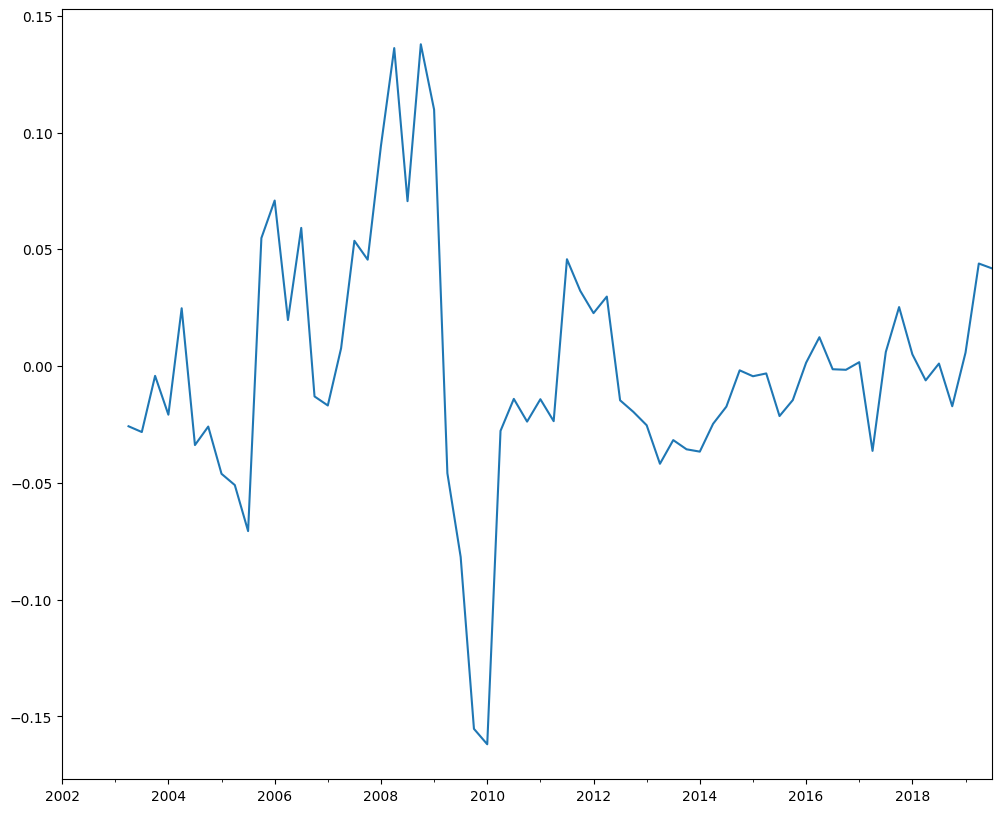

In [99]:
paroLog_diff_1_4 = paroLog_diff_1.diff(periods=4)
paroLog_diff_1_4.plot()
plt.show()


#### Comprobación de estacionariedad



In [100]:
test_stationarity(paroLog_diff_1_4.dropna(inplace=False))



Results of Dickey-Fuller Test:
Test Statistic                 -2.428968
p-value                         0.133727
#Lags Used                      8.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


#### Autocorrelaciones 



In [101]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


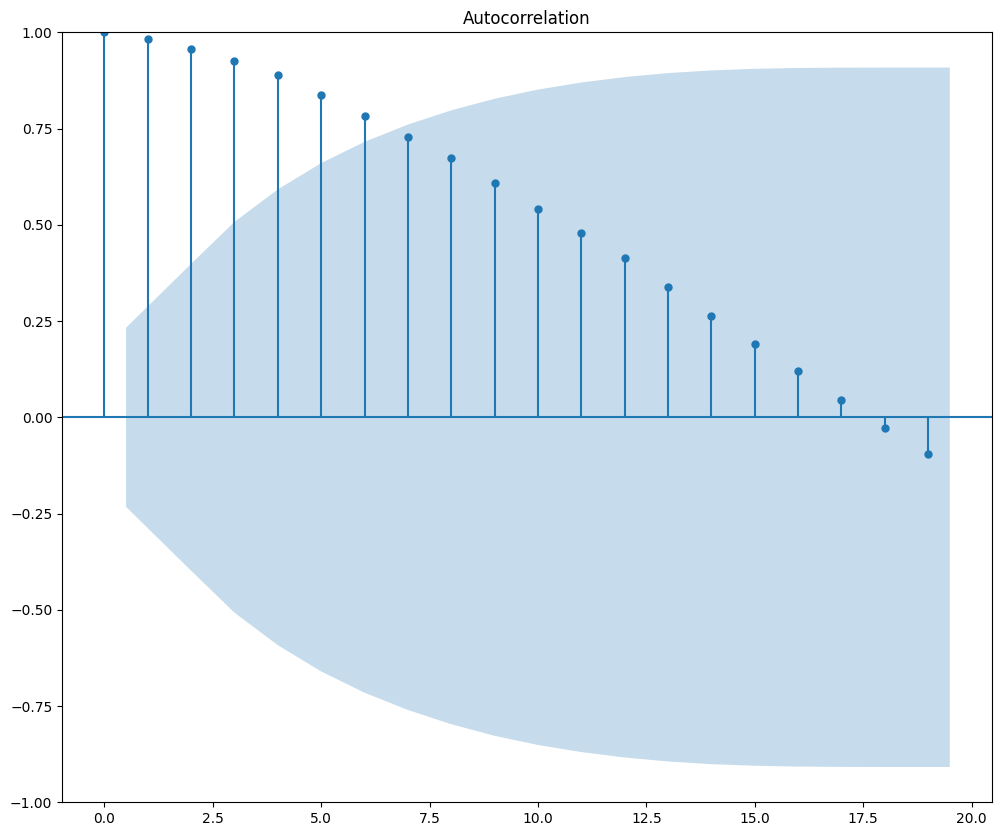

In [102]:
plot_acf(paro['Total Nacional'].dropna(inplace=False))
plt.show()


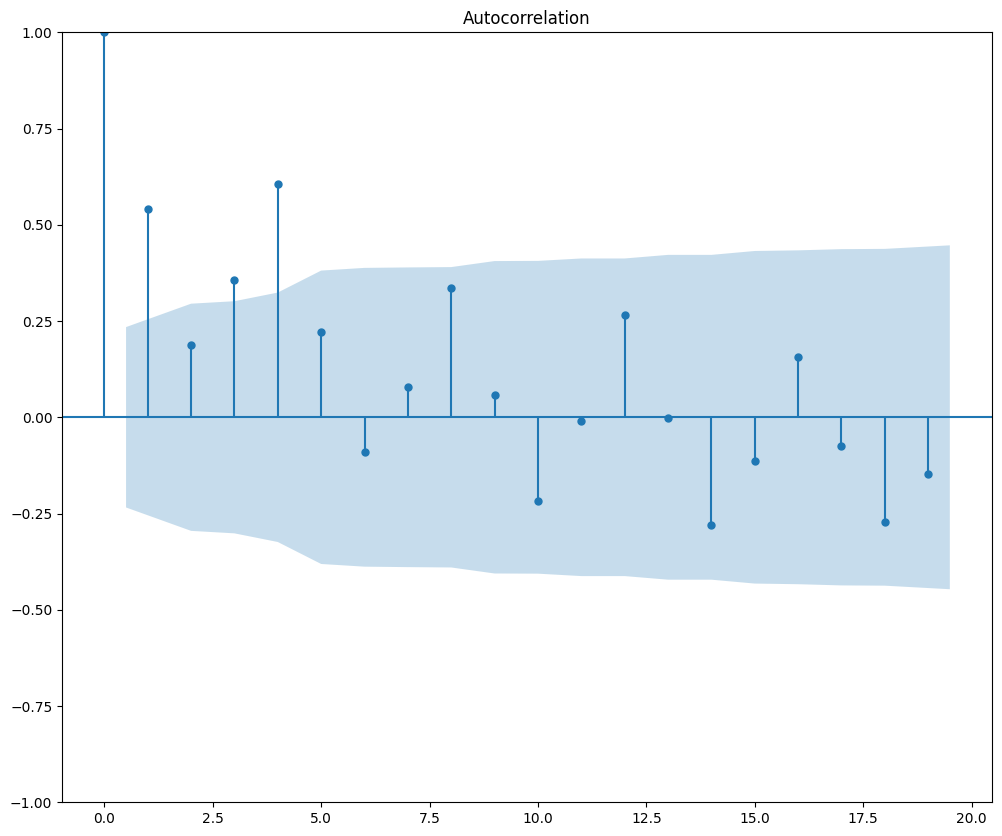

In [103]:
plot_acf(paroLog_diff_1.dropna(inplace=False))
plt.show()


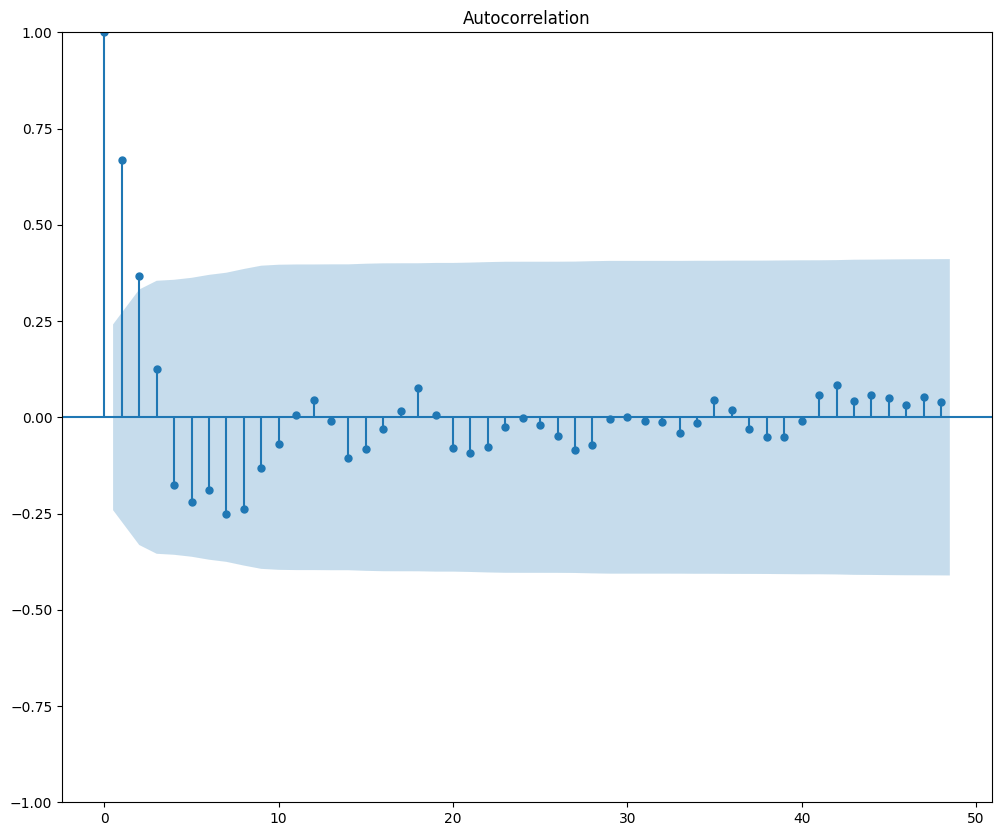

In [104]:
plot_acf(paroLog_diff_1_4.dropna(inplace=False), lags=48)
plt.show()


In [105]:
# Tets Ljung-box
sm.stats.acorr_ljungbox(paroLog_diff_1_4.dropna(inplace=False), lags=12, return_df=True)


lb_stat     lb_pvalue
1   30.762271  2.916537e-08
2   40.183281  1.880664e-09
3   41.326263  5.575975e-09
4   43.586244  7.819359e-09
5   47.130396  5.344107e-09
6   49.825835  5.094557e-09
7   54.612821  1.778849e-09
8   59.052182  7.149413e-10
9   60.395868  1.124634e-09
10  60.771887  2.588421e-09
11  60.774787  6.654496e-09
12  60.951755  1.513074e-08

In [106]:
sm.stats.acorr_ljungbox(paro['Total Nacional'], lags=12, return_df=True)



lb_stat      lb_pvalue
1    71.611183   2.620671e-17
2   140.188994   3.616985e-31
3   205.530960   2.691508e-44
4   266.633631   1.695794e-56
5   321.815273   2.036913e-67
6   370.592115   5.838948e-77
7   413.634586   2.838166e-85
8   450.897511   2.374836e-92
9   481.772609   4.586011e-98
10  506.628889  1.691407e-102
11  526.388666  7.516261e-106
12  541.378402  3.407326e-108

## Modelos de suavizado

Exploramos ahora los distintos métodos de suavizado estudiados sobre la serie de pasajeros de avión. Antes de nada, tomamos las ventanas de training y test para ajuste y evaluación del modelo, respectivamente. 


In [107]:
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

paroN = paro['Total Nacional']

paro_tr = paroN[:'2017-12-31']
paro_tst = paroN['2018-03-31':]

paro_tr
paro_tst

2018-03-31    16.74
2018-06-30    15.28
2018-09-30    14.55
2018-12-31    14.45
2019-03-31    14.70
2019-06-30    14.02
2019-09-30    13.92
Freq: Q-DEC, Name: Total Nacional, dtype: float64

Definimos aquí una función para evaluar un modelo (será válido para modelos de suavizado y arima de statsmodels pero no para auto_arima...distintos valores de salida y ajustaremos luego la función para ello)



In [108]:
#forecast_accuracy(fc, test.values)

# Función para evaluar modelo
def eval_model(model,tr,tst,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue)
    pred = model.forecast(steps=len(tst))
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Pasajeros')
    plt.xlabel('Date')
    plt.show()
    print(lb)
 


#### Suavizado Simple

Suavizado simple, ya sabemos que no va a ajustar bien pues es para series sin tendencia y estacionalidad. Solo por ver como ajustarlo en caso de necesidad. Esperamos predicciones constantes para la ventana de test. 


In [109]:
ses = ets.SimpleExpSmoothing(paro_tr).fit()



Evaluación del modelo SES.



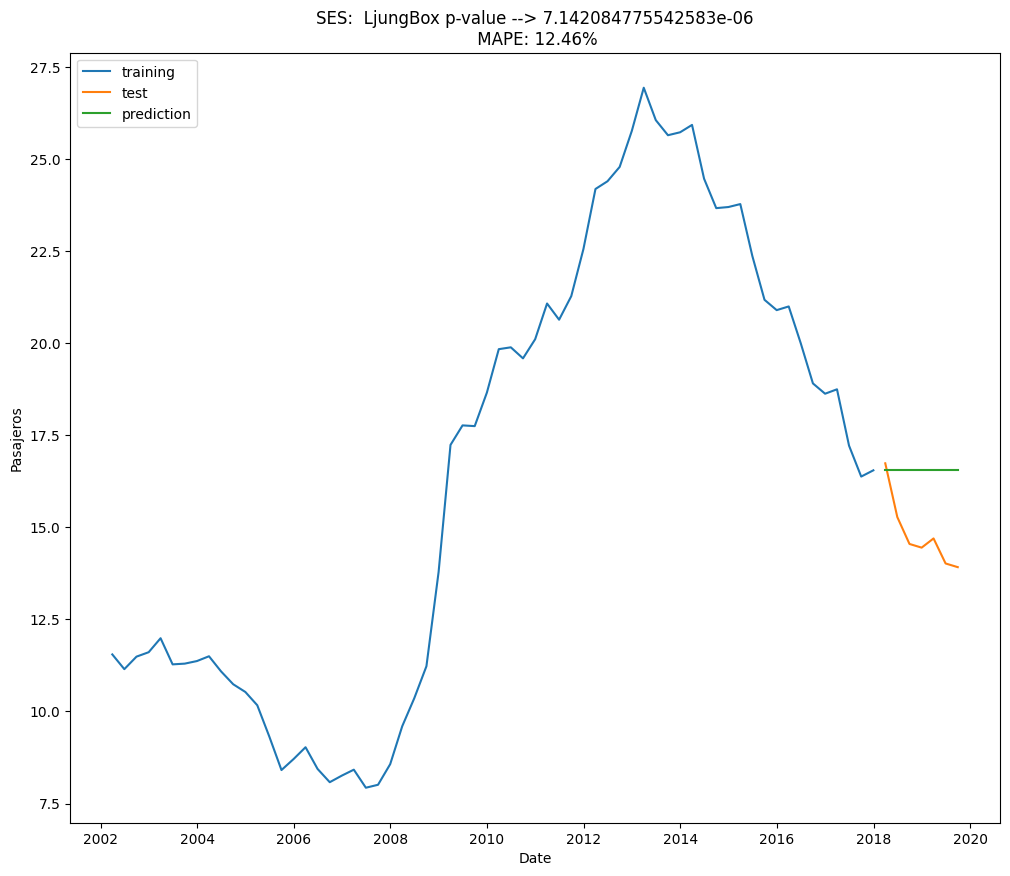

7.142084775542583e-06


In [110]:
# Evaluar SES
eval_model(ses,paro_tr,paro_tst,'SES')


#### Suavizado doble de Holt

Suavizado doble de Holt, con pendiente pero sin componente estacional. Esperamos una recta con pendiente como predicción.


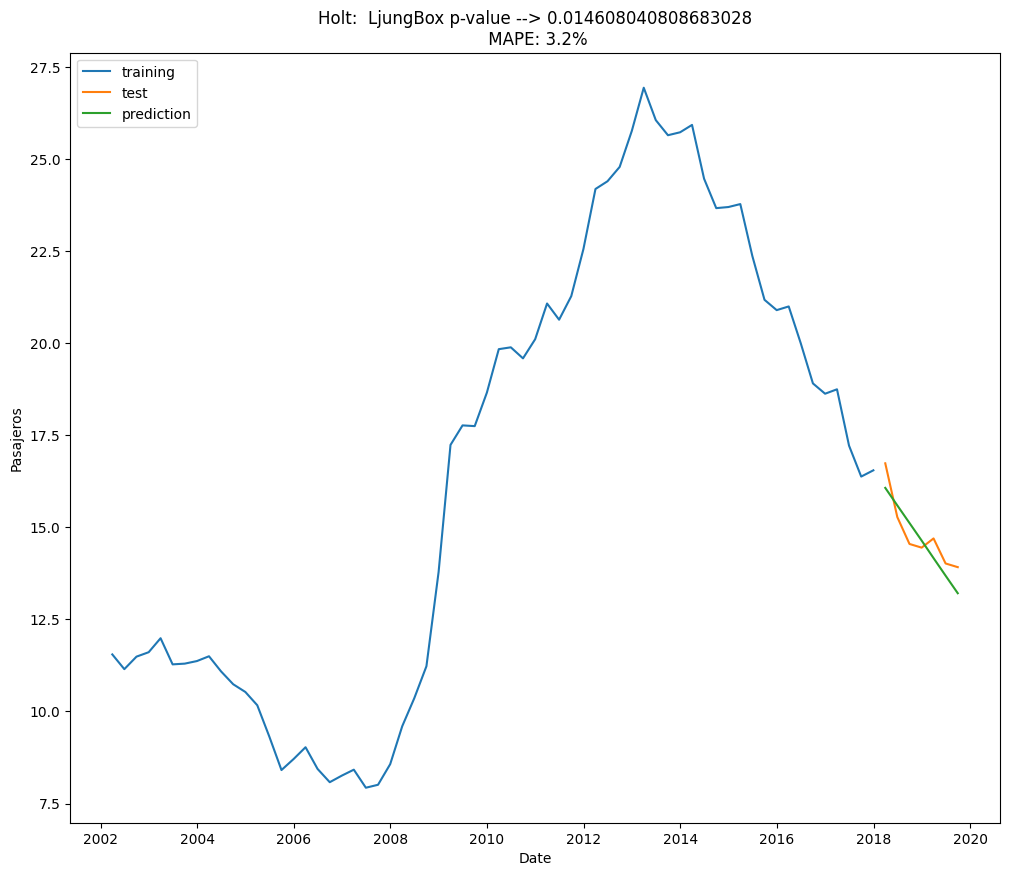

0.014608040808683028


In [111]:
# Suavizado de Holt
holt = ets.Holt(paro_tr).fit()
holt.summary()

eval_model(holt,paro_tr,paro_tst,'Holt')


#### Suavizado de Holt Winters Aditivo

Ahora si, vamos a los métodos que podrían funcionar sobre esta serie. En primer lugar, Holt Winters aditivo. Con el aspecto de la serie y la clara heterocedasticidad, no parece que sea la mejor opción...pero probad con el logaritmo veréis que cambio. 


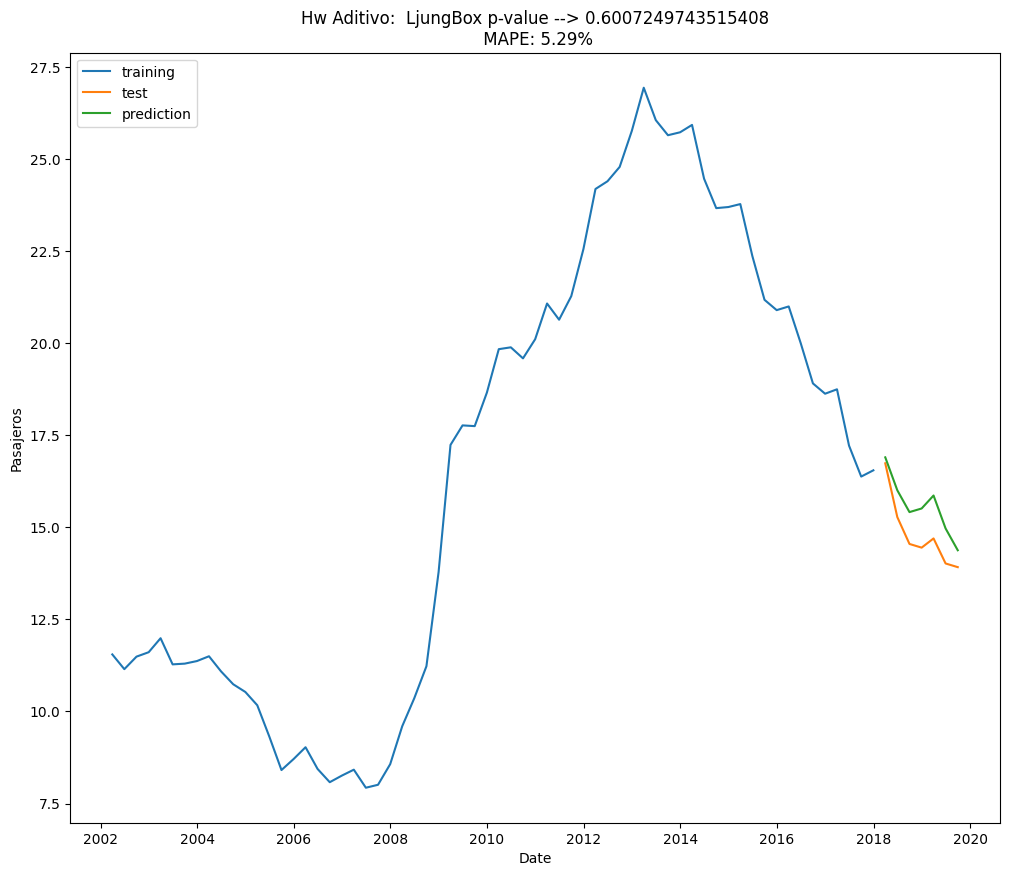

0.6007249743515408


In [112]:
hw_add = ets.ExponentialSmoothing(paro_tr,trend='add', damped_trend=False, seasonal='add').fit()
hw_add.summary()

eval_model(hw_add,paro_tr,paro_tst,'Hw Aditivo')


#### Suavizado de Holt Winters Multiplicativo

Suavizado multiplicativo para captar la componente estacional no constante con el tiempo. 


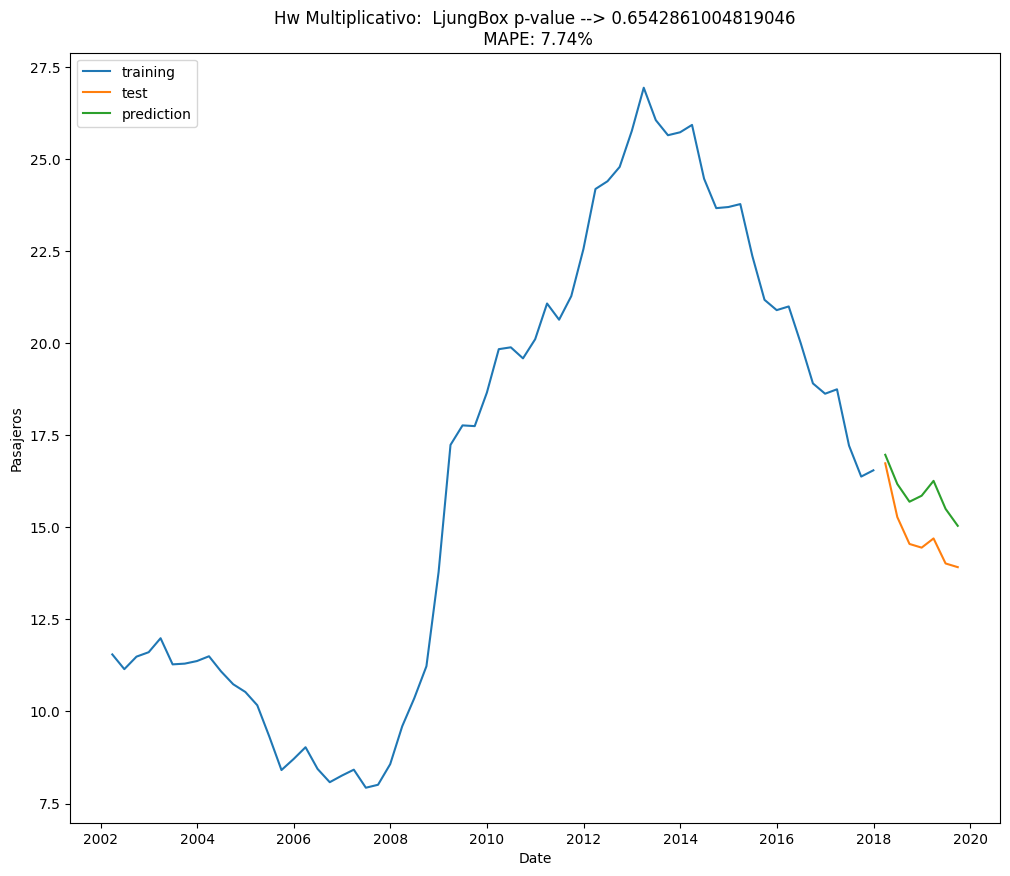

0.6542861004819046


In [115]:
hw_mul = ets.ExponentialSmoothing(paro_tr,trend='mul', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

eval_model(hw_mul,paro_tr,paro_tst,'Hw Multiplicativo')


#### Autocorrelaciones con intervalos de confianza

Podemos evaluar los correlogramas de los residuos para este último modelo multiplicativo.


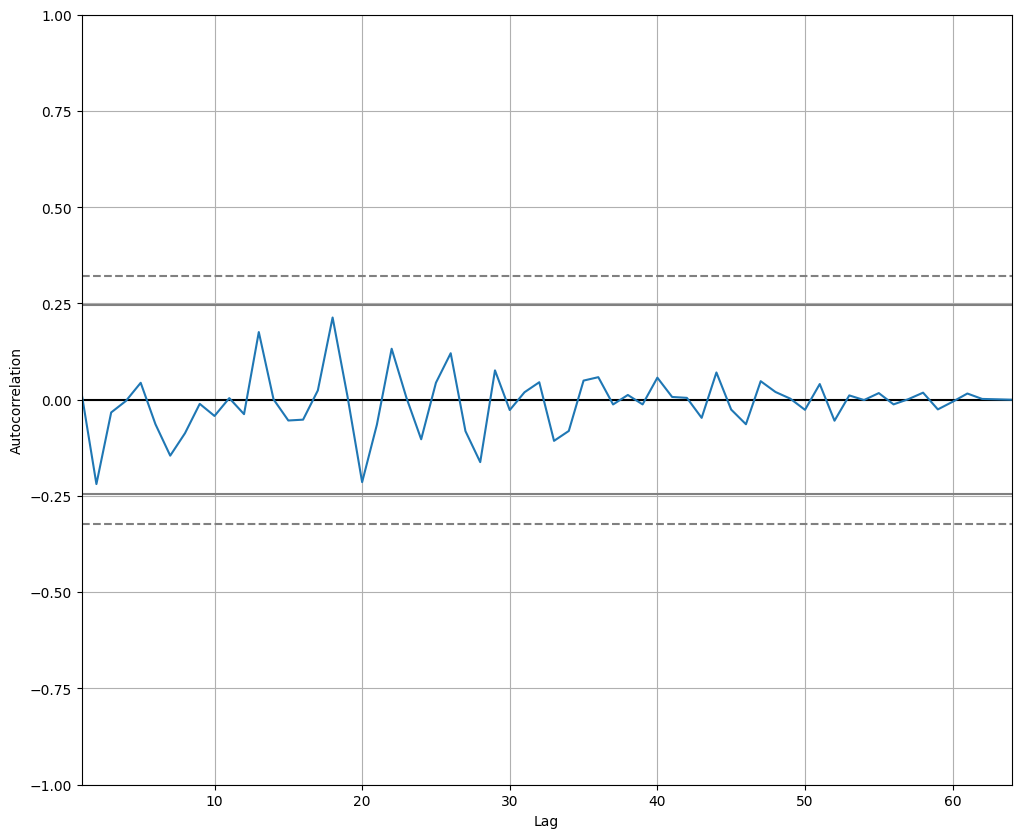

In [116]:
from pandas.plotting import autocorrelation_plot

plt.clf()
autocorrelation_plot(hw_mul.resid)
plt.show()


Y el aditivo?



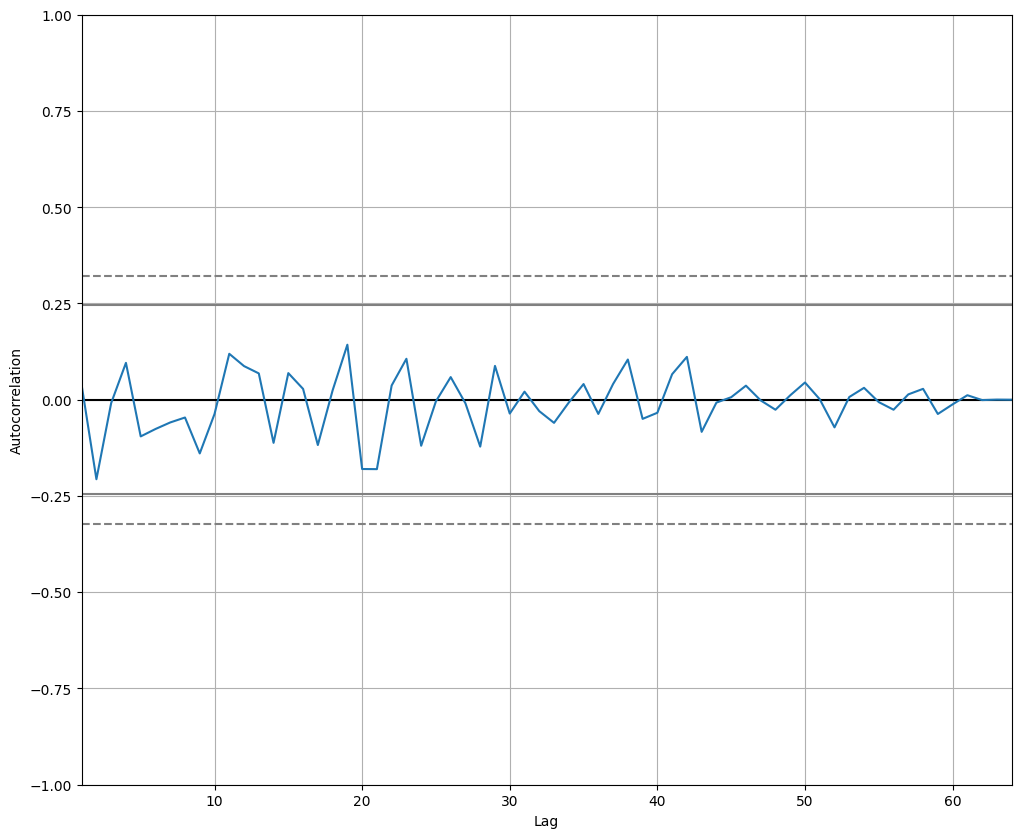

In [117]:
plt.clf()
autocorrelation_plot(hw_add.resid)
plt.show()


# Series temporales II. Modelos ARIMA


## Definición de funciones para evaluación

Vamos a reciclar y adeuar las funciones necesarias para facilitarnos la vida en el proceso de ajuste de modelos (arima y en general).

La primera puede funcionar de forma general para cualquier modelo ya que su entrada es el vector de la serie residual..así podremos usarla para culquier filtro de series que apliquemos.

La segunda es una adecuación de la función definida en la parte de suavizado para que pueda funcionar sobre auto_arima (de otro paquete) pues tiene salidas y explotación de modelo distintas. En particular, en auto_arima el *forecast* es *predict* y *resid* es *resid()*


In [118]:
import scipy.stats as stats
import seaborn as sns

# Función para evaluar residuos a través de contrastes de hipótesis
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
        
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
        
    Lags should be min(2*seasonal_period, T/5)
        
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
        
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(sm.stats.acorr_ljungbox(x=residuals, lags=lags).lb_pvalue)
    norm_p_val =  stats.jarque_bera(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
        
      
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));
    
    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    plt.show()
    print("** Mean of the residuals: ", np.around(resid_mean,2))
        
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), 
        "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
        
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3),
        "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
        
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), 
        "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    return ts_ax, acf_ax, kde_ax   
 
  


In [119]:
# Función para evaluar modelo auto_arima
def eval_model_Aarima(model,tr,tst,name='Model',lags=12):
      lb = np.mean(sm.stats.acorr_ljungbox(model.resid(), lags=lags, return_df=True).lb_pvalue)
      pred = model.predict(n_periods=len(tst))
      fig1, ax = plt.subplots()
      ax.plot(tr, label='training')
      ax.plot(tst, label='test')
      ax.plot(pred, label='prediction')
      plt.legend(loc='upper left')
      tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
      plt.title(tit)
      plt.ylabel('Serie')
      plt.xlabel('Date')
      plt.show()
      model.plot_diagnostics(figsize=(14,10))
      plt.show()  


## Arima Manual

Podemos ajustar modelos ARIMA manuales con SARIMAX de statsmodels. Para ello, en primer lugar se deben evaluar las autodcoleraciones para identificar patrones de efectos AR y MA tentativos. Una vez tenemos una idea de los órdenes a proponer, ajustamos los modelos. 

Recordamos correlogramas de la serie logaritmica y doblemente diferenciada. 


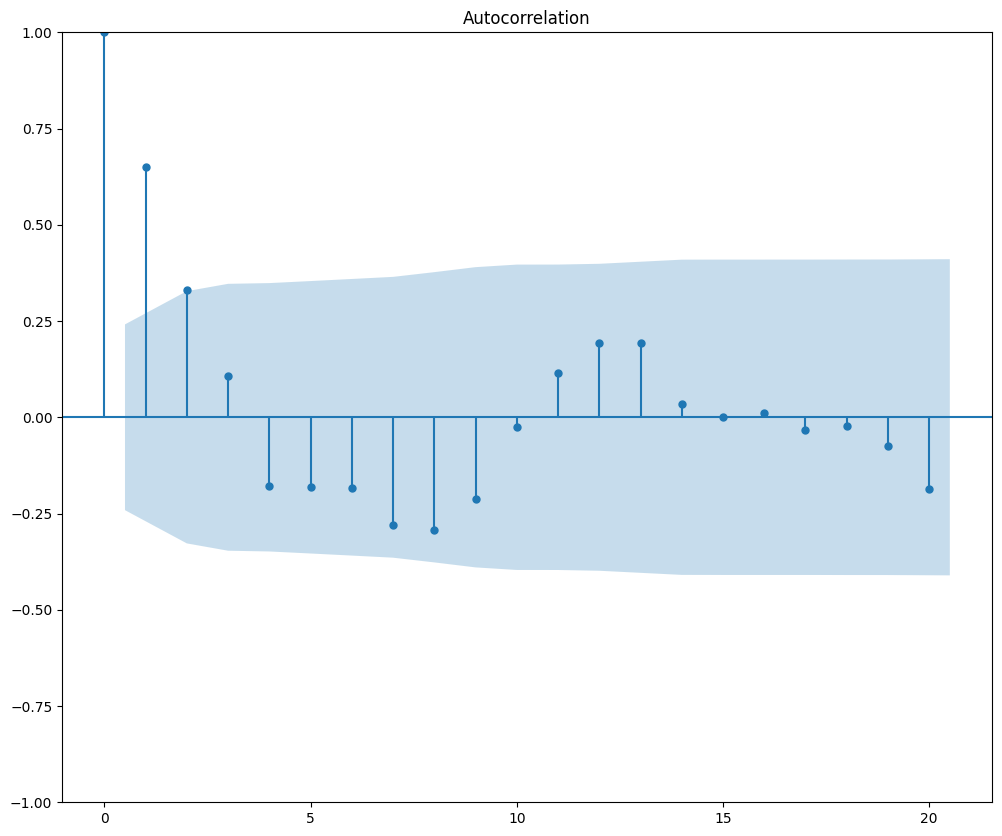

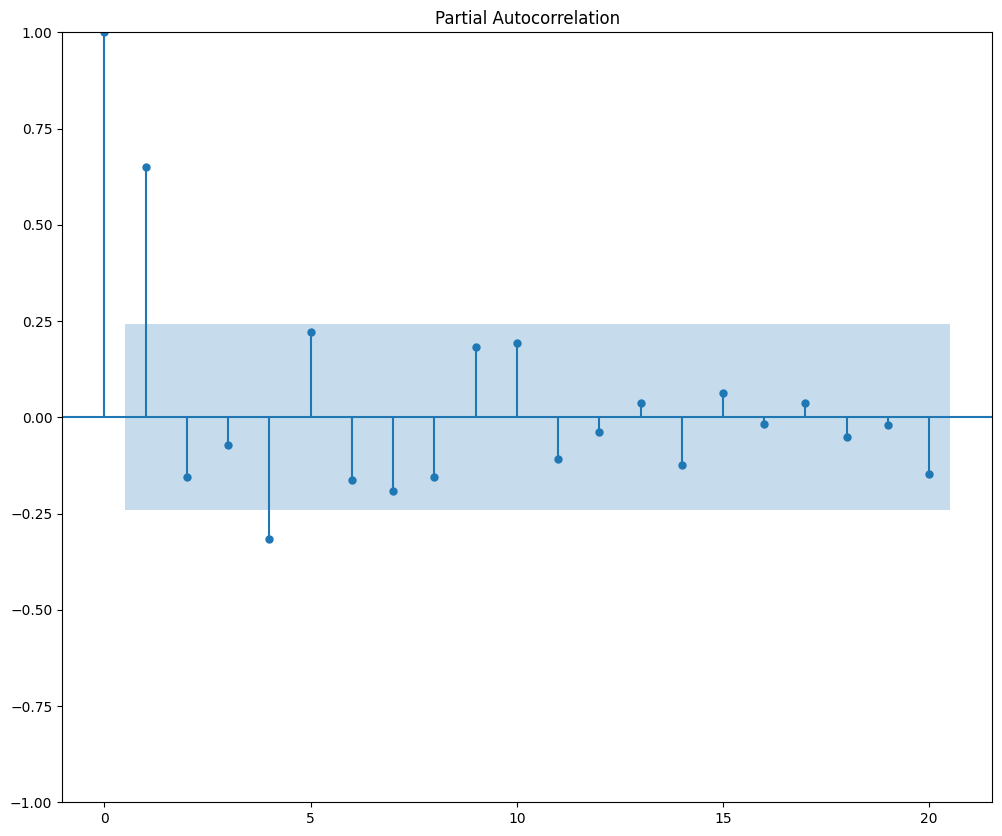

In [132]:
plot_acf(paroN.diff(periods=1).diff(periods=4).dropna(inplace=False),lags=20)
plt.show()
plot_pacf(paroN.diff(periods=1).diff(periods=4).dropna(inplace=False),lags=20,method='ywm')
plt.show()


**ACF**: En lo regular, parece decrecimiento, lo que indicaría un AR. En lo estacional no queda muy claro, no parece decrecimiento, tal vez un MA...

**PACF**:  Con la serie doblemente diferenciada vemos, en el PACF, que la autocorrelación de orden 1 sigue siendo signifcativa y tambien la de orden 4.  

Por esto nuestro candidato a ajustar sería: ARIMA(1,1,0)(0,1,1)[4], o cualquiera de sus variaciones en las posiciones autoregresivas o de medias móviles.


**Modelo 1** -> Con ambas partes MA


In [133]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima1 = SARIMAX(paro_tr, 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 0, 4))
  
arima_1 = arima1.fit()
arima_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                    Total Nacional   No. Observations:                   64
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 4)   Log Likelihood                 -45.212
Date:                           Sat, 24 Feb 2024   AIC                             96.424
Time:                                   12:08:54   BIC                            102.657
Sample:                               03-31-2002   HQIC                            98.857
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7192      0.060     11.972      0.000       0.601       0.837
ar.S.L4       -0.3904      0.167     -2.341      0.019      -0.717      -0.064
sigma2         0.2657      0.037      7.268      0.000       0.194       0.337
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                11.77
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.26
Prob(H) (two-sided):                  0.60   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

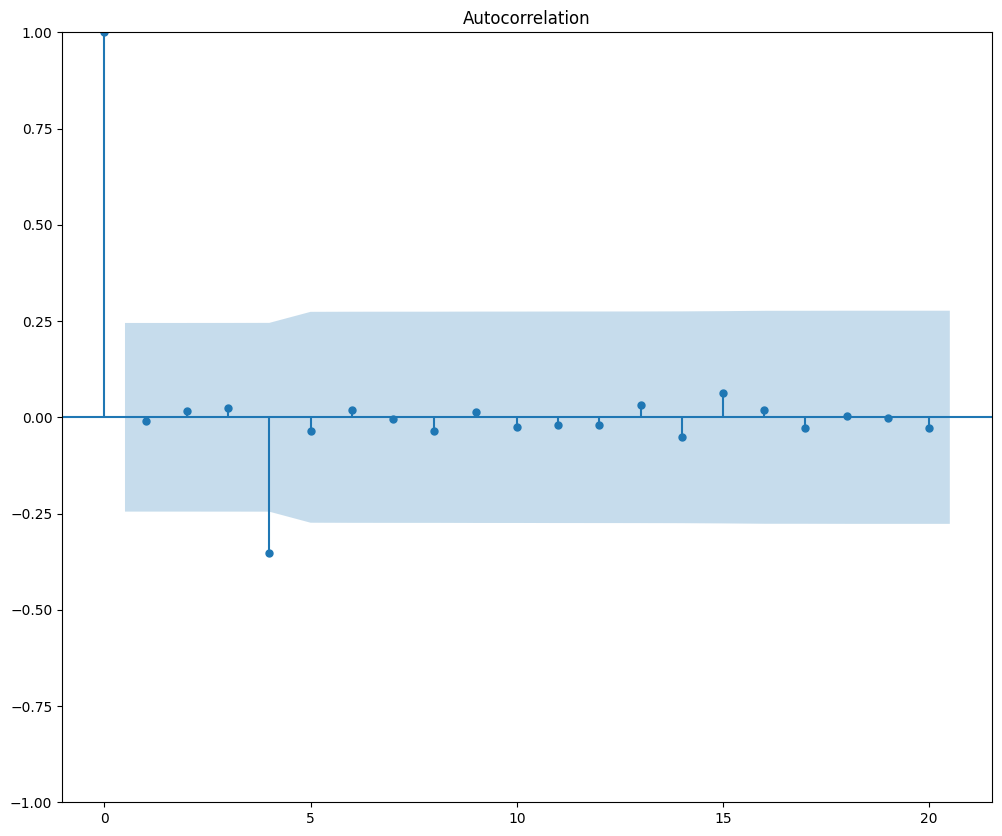

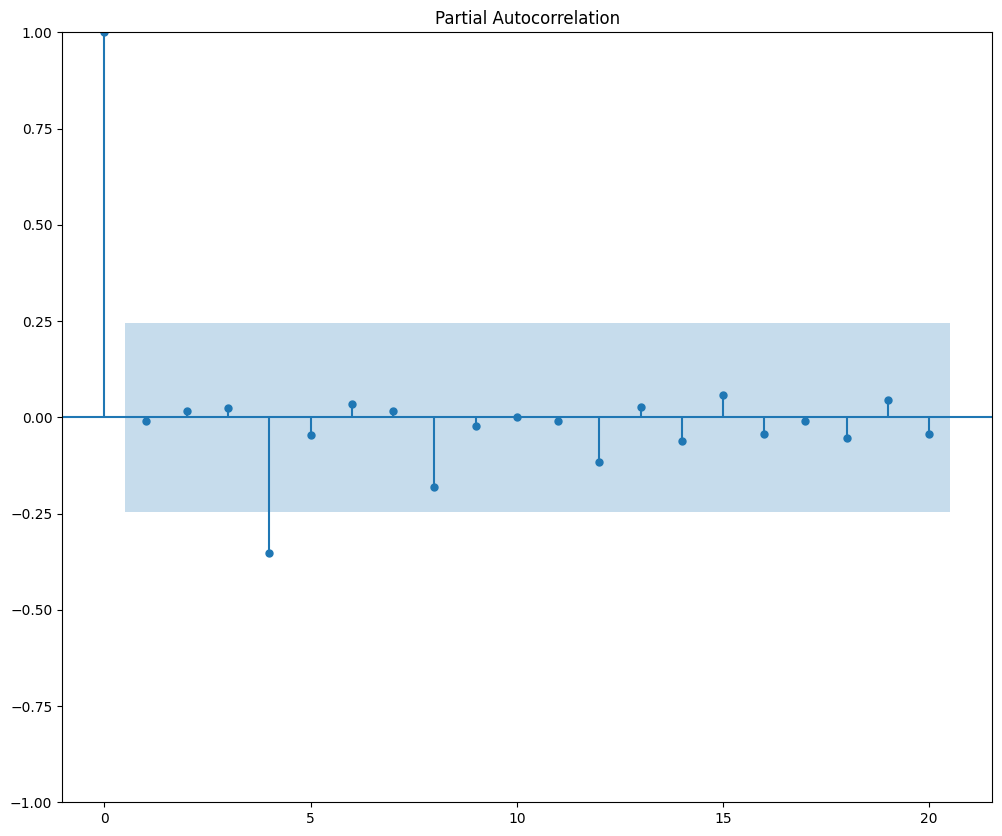

In [134]:
plot_acf(arima_1.resid,lags=20)
plt.show()
plot_pacf(arima_1.resid,lags=20,method='ywm')
plt.show()


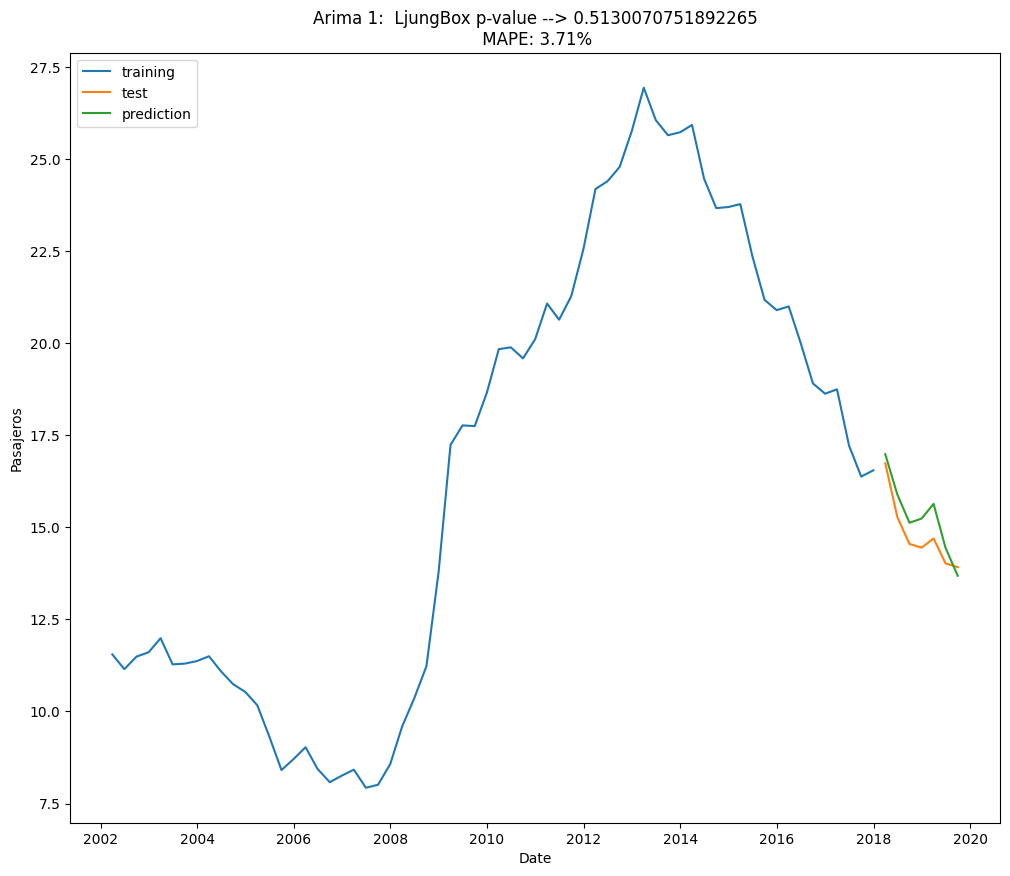

0.5130070751892265


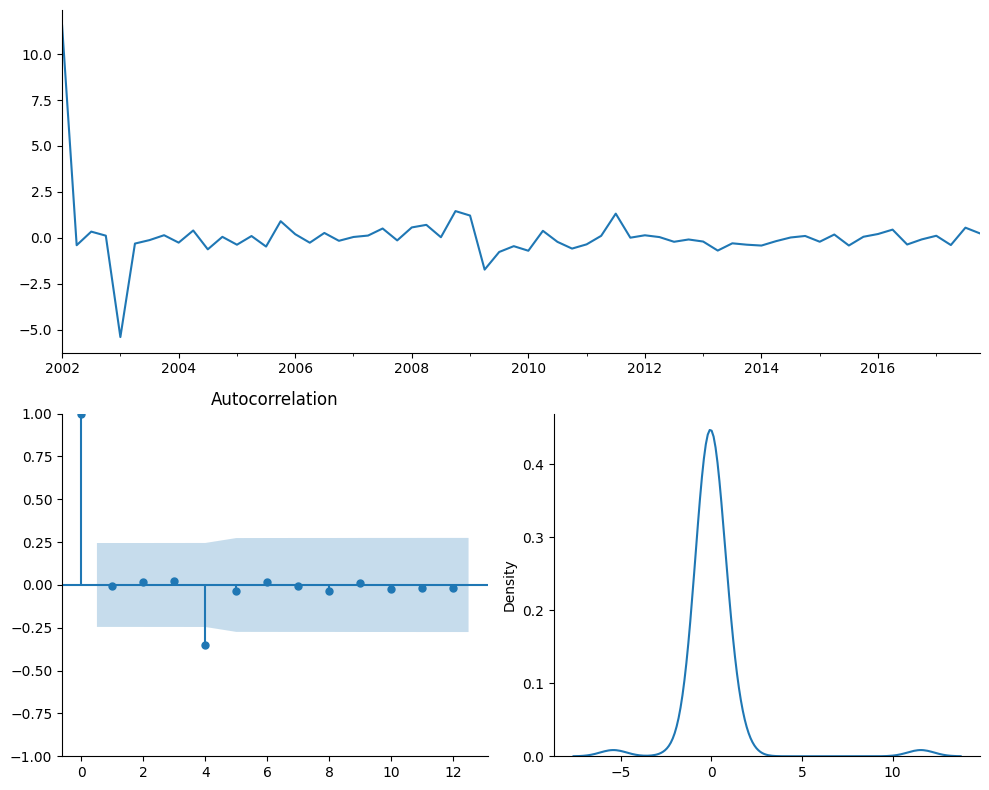

** Mean of the residuals:  0.09

** Ljung Box Test, p-value: 0.513 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [135]:
eval_model(arima_1,paro_tr,paro_tst,'Arima 1')

residcheck(arima_1.resid,12)


**Modelo 2** -> Introduciomos AR estacional a ver si mejora esa autocorrelación en 4



In [138]:
arima2 = SARIMAX(paro_tr, 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 0, 4))
  
arima_2 = arima2.fit()
arima_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      Total Nacional   No. Observations:                   64
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 4)   Log Likelihood                 -40.636
Date:                             Sat, 24 Feb 2024   AIC                             89.272
Time:                                     12:09:59   BIC                             97.582
Sample:                                 03-31-2002   HQIC                            92.516
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7635      0.074     10.314      0.000       0.618       0.909
ar.S.L4        0.1364      0.344      0.396      0.692      -0.538       0.811
ma.S.L4       -0.7972      0.223     -3.570      0.000      -1.235      -0.360
sigma2         0.2187      0.027      8.068      0.000       0.166       0.272
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                27.09
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.38
Prob(H) (two-sided):                  0.64   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

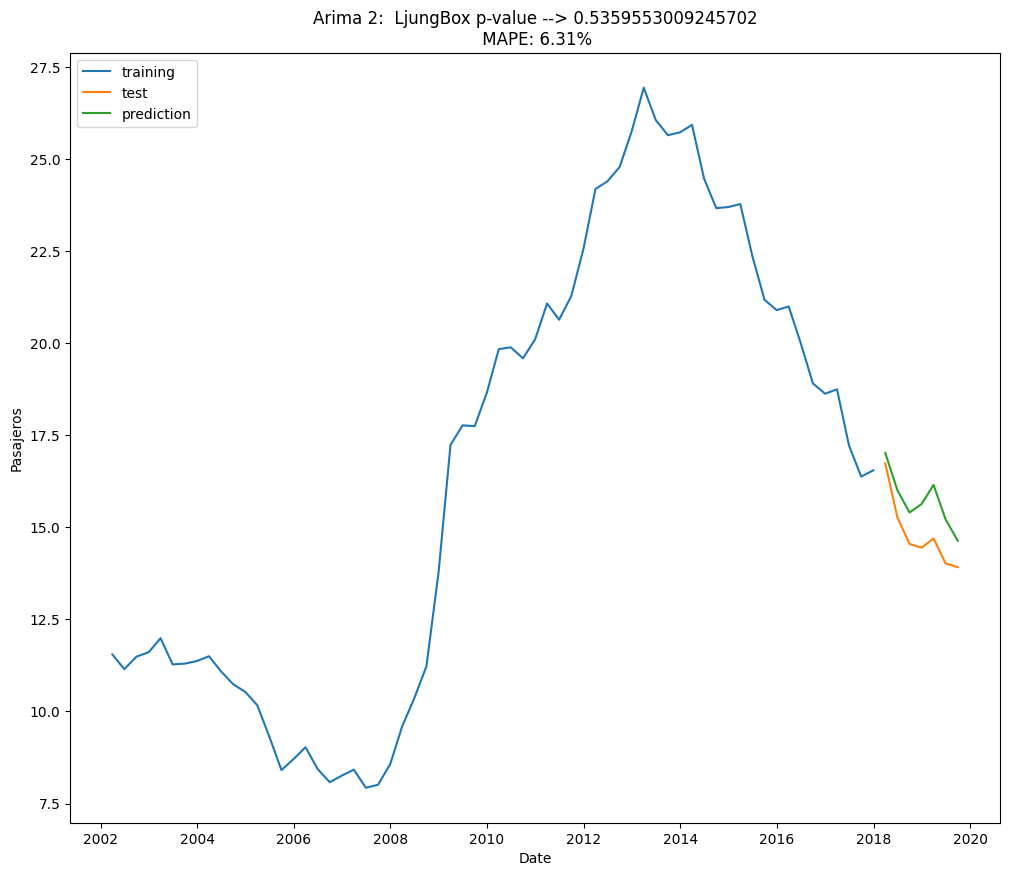

0.5359553009245702


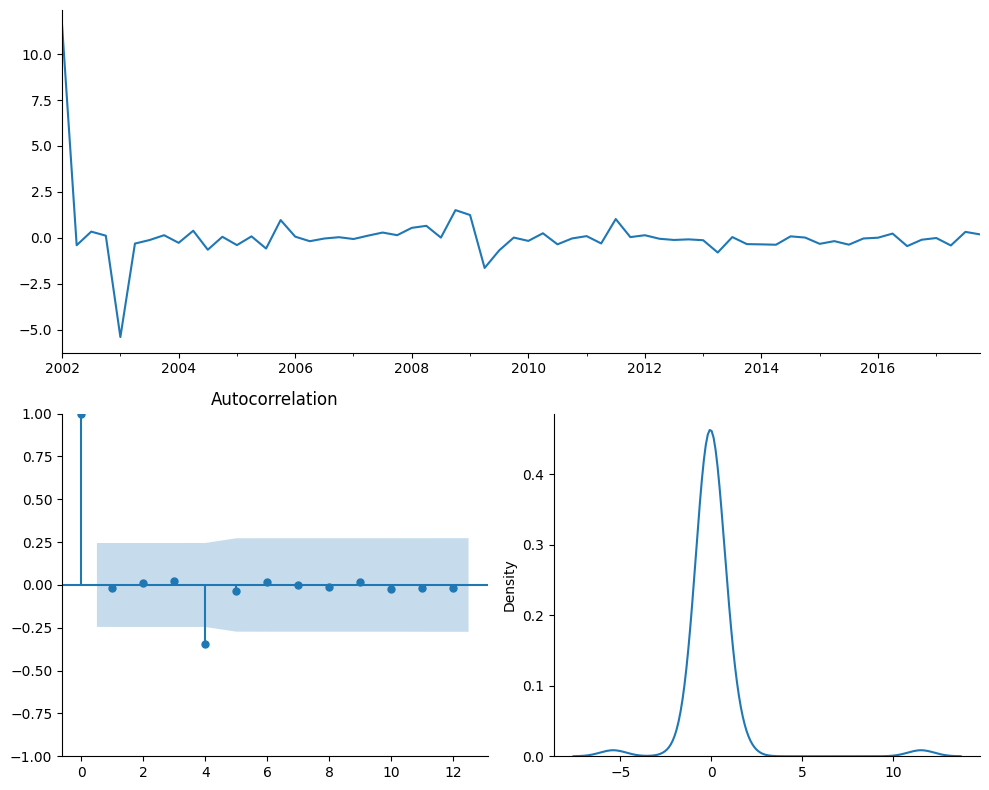

** Mean of the residuals:  0.08

** Ljung Box Test, p-value: 0.536 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [139]:
eval_model(arima_2,paro_tr,paro_tst,'Arima 2')

residcheck(arima_2.resid,12)


**Modelo 3** -> Orden 2 de MA en lo estacional?



In [140]:
arima3 = SARIMAX(paro_tr, 
                order = (1, 1, 1), 
                seasonal_order =(1, 0, 1, 12))
  
arima_3 = arima3.fit()
arima_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Total Nacional   No. Observations:                   64
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 -54.554
Date:                            Sat, 24 Feb 2024   AIC                            119.107
Time:                                    12:10:51   BIC                            129.823
Sample:                                03-31-2002   HQIC                           123.322
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8260      0.071     11.657      0.000       0.687       0.965
ma.L1         -0.1807      0.144     -1.257      0.209      -0.462       0.101
ar.S.L12       0.9149      0.134      6.811      0.000       0.652       1.178
ma.S.L12      -0.4913      0.309     -1.591      0.112      -1.097       0.114
sigma2         0.2748      0.061      4.482      0.000       0.155       0.395
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.65   Prob(JB):                         0.31
Heteroskedasticity (H):               1.35   Skew:                             0.07
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

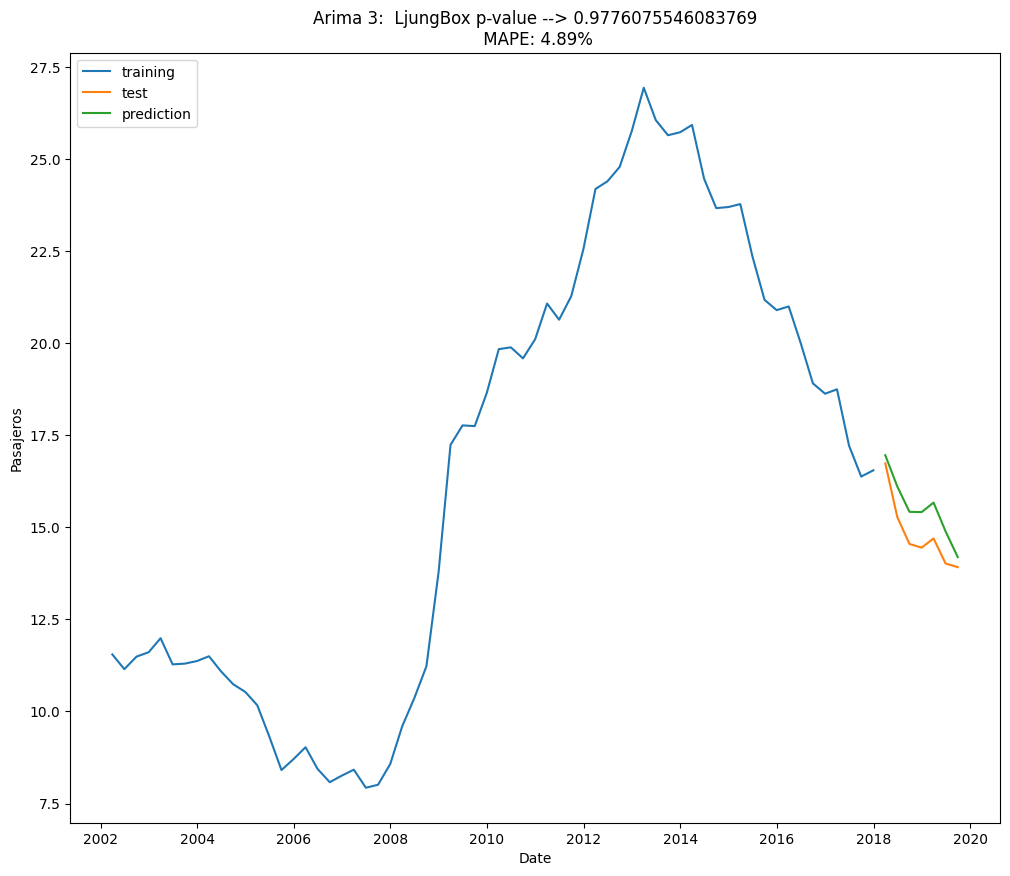

0.9776075546083769


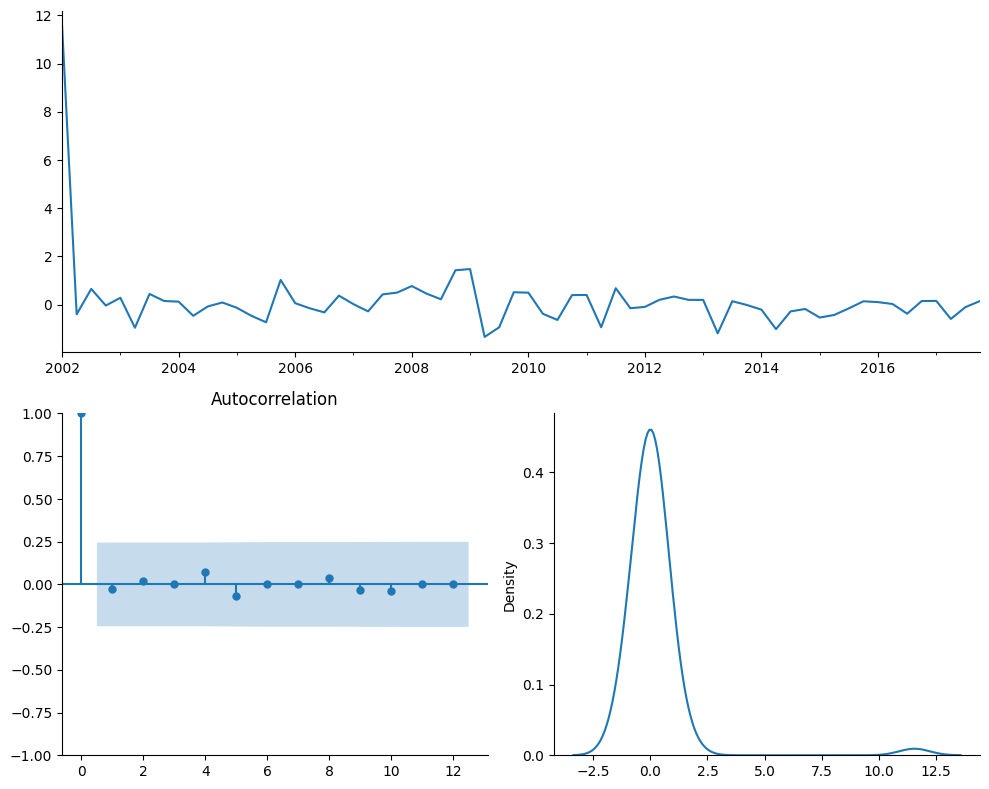

** Mean of the residuals:  0.17

** Ljung Box Test, p-value: 0.978 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.001 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [141]:
eval_model(arima_3,paro_tr,paro_tst,'Arima 3')
residcheck(arima_3.resid,12)


## Arima automático

En esta parte presentamos la selección de modelos arima mediante AIC que implementa el paquete *pmdarima*. Se puede jugar bastante con órdenes máximos y mínimos para los efectos autoregresivos y de medias móviles, así como con las diferenciaciones regular y estacional. 


Vamos a ajustar el mejor modelo ARIMA automático a la serie clásica de vuelos. 


In [145]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(paro_tr, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=4,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      information_criterion='bic',
                      stepwise=True)

print(arima_auto.summary())


Performing stepwise search to minimize bic
 ARIMA(1,2,1)(1,0,1)[4]             : BIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[4]             : BIC=162.580, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[4]             : BIC=123.624, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[4]             : BIC=139.669, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[4]             : BIC=165.868, Time=0.02 sec
 ARIMA(1,2,0)(2,0,0)[4]             : BIC=120.234, Time=0.04 sec
 ARIMA(1,2,0)(2,0,1)[4]             : BIC=116.386, Time=0.08 sec
 ARIMA(1,2,0)(1,0,1)[4]             : BIC=112.276, Time=0.05 sec
 ARIMA(1,2,0)(0,0,1)[4]             : BIC=145.345, Time=0.02 sec
 ARIMA(1,2,0)(1,0,2)[4]             : BIC=116.378, Time=0.09 sec
 ARIMA(1,2,0)(0,0,2)[4]             : BIC=142.009, Time=0.03 sec
 ARIMA(1,2,0)(2,0,2)[4]             : BIC=120.311, Time=0.17 sec
 ARIMA(0,2,0)(1,0,1)[4]             : BIC=108.643, Time=0.04 sec
 ARIMA(0,2,0)(0,0,1)[4]             : BIC=142.516, Time=0.02 sec
 ARIMA(0,2,0)(1,0,0)[4]             : BIC=119.851, 

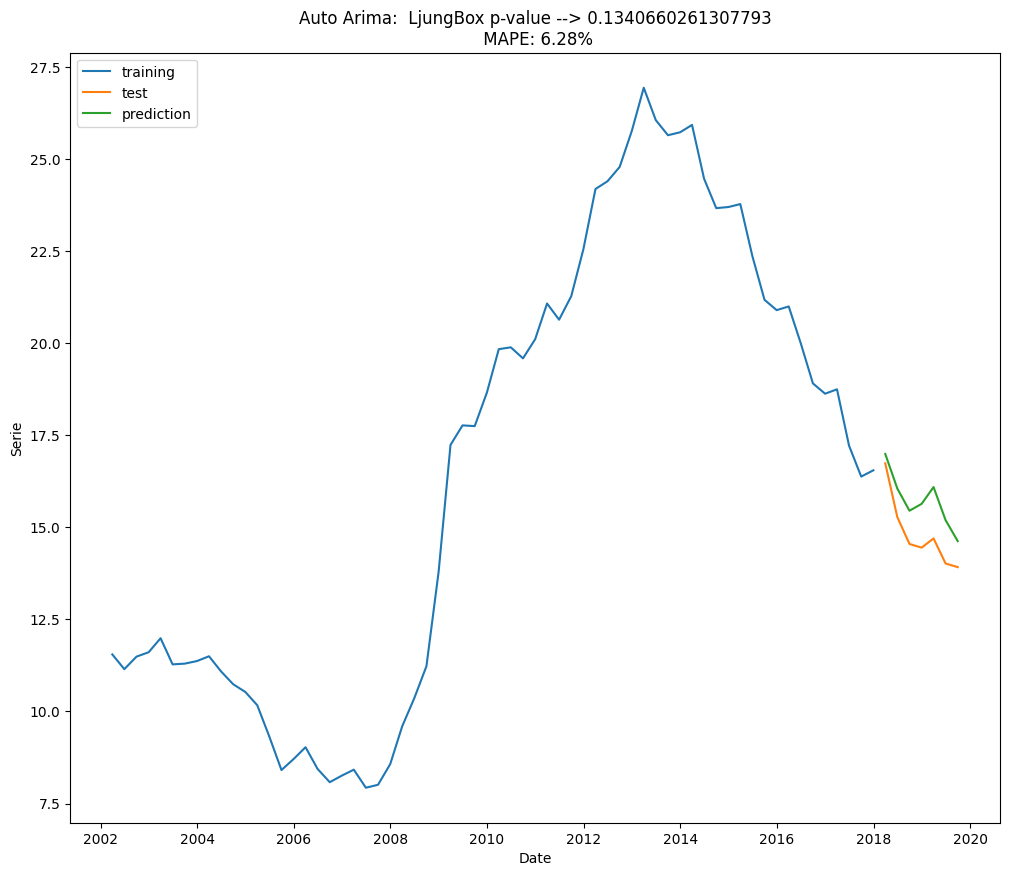

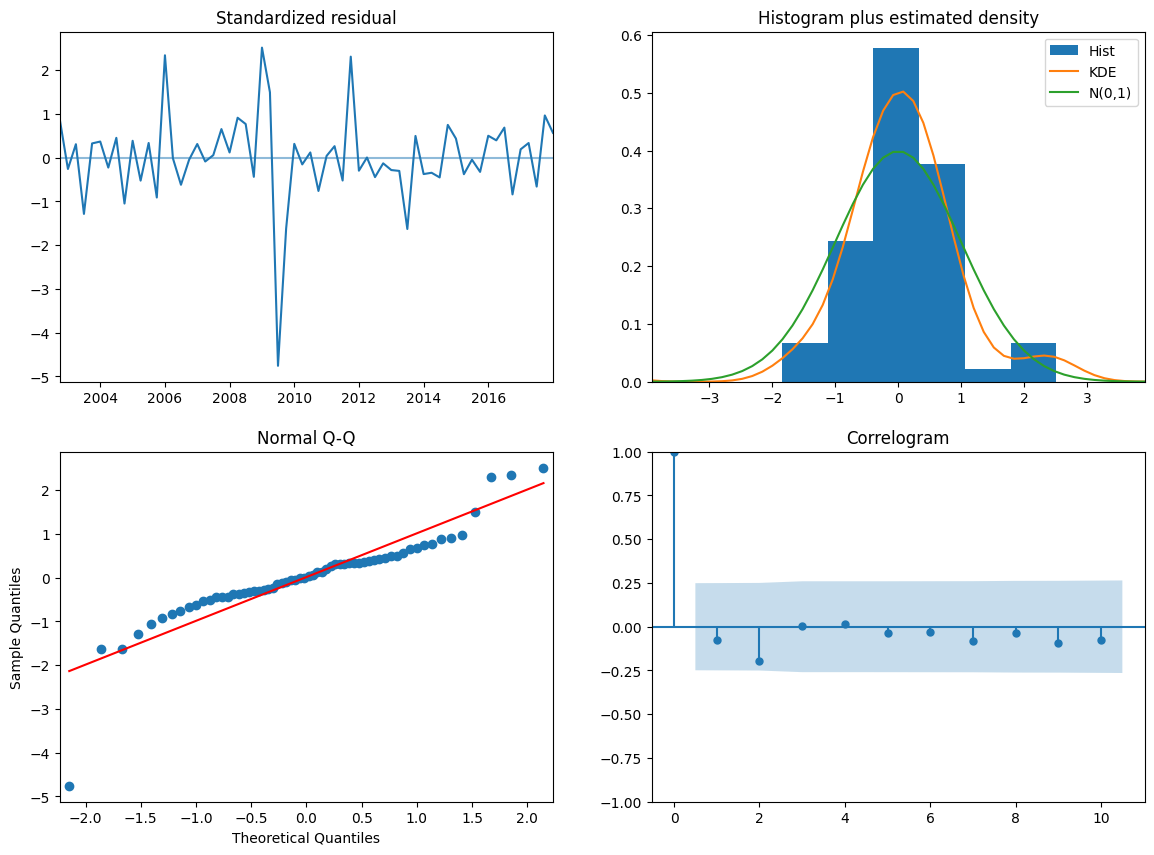

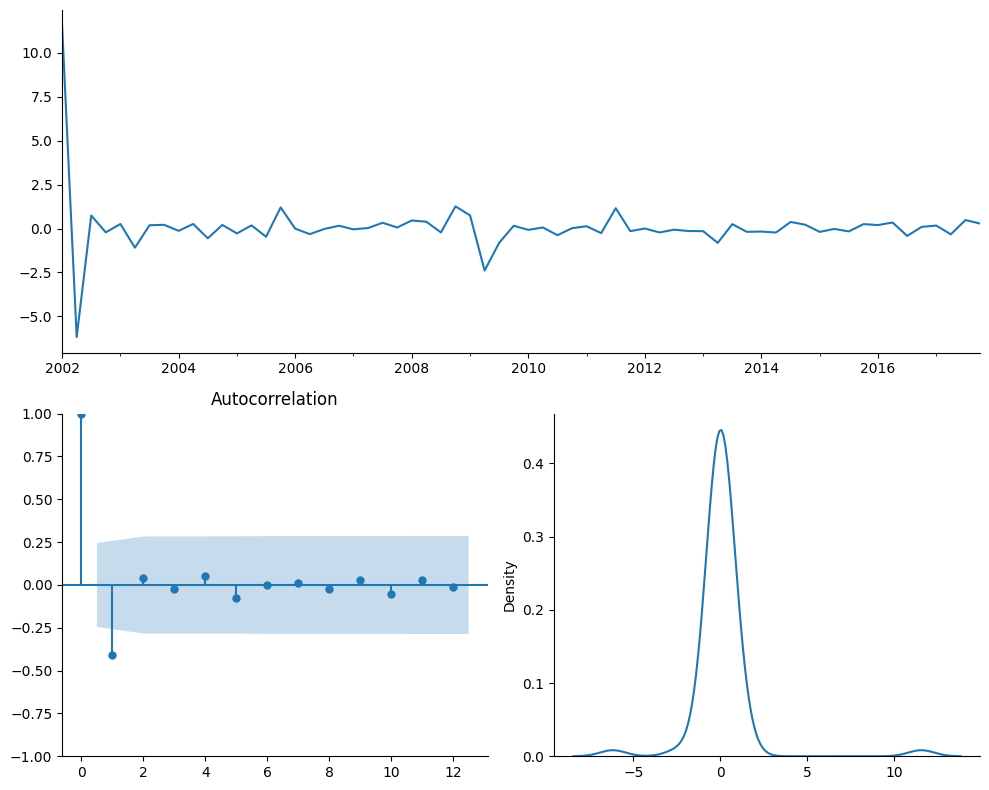

** Mean of the residuals:  0.09

** Ljung Box Test, p-value: 0.134 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [143]:
eval_model_Aarima(arima_auto,paro_tr,paro_tst,'Auto Arima')
residcheck(arima_auto.resid(),12)


# Nuevos datos y predicciones

Ahora llega la hora de la verdad para el convulso periodo de pandemia. Disponemos de los datos hasta el tercer trimestre de 2021 y quisiéramos valorar la capacidad predictiva de los modelos investigados en estos nuevos datos. 

Leemos los datos nuevos y los arreglamos.

In [146]:
# Lectura de datos
paro_tst = pd.read_excel('C:\\Users\\Guille\\Documents\\MineriaDatos_2022_23\\Datos\\Paro_2020_21.xls')
paro_tst.head()

Total Nacional  01 Andalucía  02 Aragón  \
0      2019T4           13.78         20.80       9.93   
1      2020T1           14.41         21.21      10.64   
2      2020T2           15.33         21.32      11.78   
3      2020T3           16.26         23.80      11.90   
4      2020T4           16.13         22.74      12.49   

   03 Asturias, Principado de  04 Balears, Illes  05 Canarias  06 Cantabria  \
0                       13.14               9.91        18.78         11.18   
1                       14.37              18.20        18.79         11.09   
2                       14.45              15.93        21.55         13.76   
3                       14.16              13.28        25.04         12.02   
4                       13.50              17.34        25.22         11.79   

   07 Castilla y León  08 Castilla - La Mancha  ...  10 Comunitat Valenciana  \
0               11.20                    16.56  ...                    14.13   
1               11.82                    18.11  ...                    14.39   
2               12.35                    16.84  ...                    16.74   
3               12.49                    18.34  ...                    17.26   
4               11.61                    17.39  ...                    16.37   

   11 Extremadura  12 Galicia  13 Madrid, Comunidad de  14 Murcia, Región de  \
0           23.48       11.74                     9.99                 16.08   
1           23.59       12.65                    10.60                 16.46   
2           21.39       11.95                    12.61                 15.62   
3           20.88       11.80                    13.25                 17.21   
4           21.32       11.66                    13.53                 15.39   

   15 Navarra, Comunidad Foral de  16 País Vasco  17 Rioja, La  18 Ceuta  \
0                            9.01           9.09          9.89     27.58   
1                            8.55           8.72         11.21     23.89   
2                           10.08           9.13         10.11     20.30   
3                            9.94          10.34         11.52     27.14   
4                           11.65           9.96         10.36     26.74   

   19 Melilla  
0       26.81  
1       23.09  
2       23.37  
3       24.14  
4       23.83  

[5 rows x 21 columns]

In [147]:
dates = pd.date_range(start='2019-12-31', periods=paro_tst.shape[0], freq='Q')
dates

DatetimeIndex(['2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30',
               '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [148]:
# Convertir en serie temporal
paro_tst.set_index(dates,inplace=True)
paro_tst = paro_tst.drop([' '],axis=1)
paro_tst

Total Nacional  01 Andalucía  02 Aragón  \
2019-12-31           13.78         20.80       9.93   
2020-03-31           14.41         21.21      10.64   
2020-06-30           15.33         21.32      11.78   
2020-09-30           16.26         23.80      11.90   
2020-12-31           16.13         22.74      12.49   
2021-03-31           15.98         22.54      12.10   
2021-06-30           15.26         21.58      10.73   
2021-09-30           14.57         22.41       8.79   

            03 Asturias, Principado de  04 Balears, Illes  05 Canarias  \
2019-12-31                       13.14               9.91        18.78   
2020-03-31                       14.37              18.20        18.79   
2020-06-30                       14.45              15.93        21.55   
2020-09-30                       14.16              13.28        25.04   
2020-12-31                       13.50              17.34        25.22   
2021-03-31                       14.09              18.88        25.42   
2021-06-30                       13.64              15.17        24.71   
2021-09-30                       12.32              10.57        23.89   

            06 Cantabria  07 Castilla y León  08 Castilla - La Mancha  \
2019-12-31         11.18               11.20                    16.56   
2020-03-31         11.09               11.82                    18.11   
2020-06-30         13.76               12.35                    16.84   
2020-09-30         12.02               12.49                    18.34   
2020-12-31         11.79               11.61                    17.39   
2021-03-31         11.88               12.64                    17.42   
2021-06-30         12.43               12.59                    16.58   
2021-09-30         10.04               10.05                    15.29   

            09 Cataluña  10 Comunitat Valenciana  11 Extremadura  12 Galicia  \
2019-12-31        10.45                    14.13           23.48       11.74   
2020-03-31        10.66                    14.39           23.59       12.65   
2020-06-30        12.78                    16.74           21.39       11.95   
2020-09-30        13.23                    17.26           20.88       11.80   
2020-12-31        13.87                    16.37           21.32       11.66   
2021-03-31        12.90                    16.51           22.22       13.00   
2021-06-30        12.28                    16.67           19.15       12.40   
2021-09-30        10.92                    16.12           17.92       10.23   

            13 Madrid, Comunidad de  14 Murcia, Región de  \
2019-12-31                     9.99                 16.08   
2020-03-31                    10.60                 16.46   
2020-06-30                    12.61                 15.62   
2020-09-30                    13.25                 17.21   
2020-12-31                    13.53                 15.39   
2021-03-31                    12.15                 16.42   
2021-06-30                    12.09                 13.15   
2021-09-30                    11.84                 14.65   

            15 Navarra, Comunidad Foral de  16 País Vasco  17 Rioja, La  \
2019-12-31                            9.01           9.09          9.89   
2020-03-31                            8.55           8.72         11.21   
2020-06-30                           10.08           9.13         10.11   
2020-09-30                            9.94          10.34         11.52   
2020-12-31                           11.65           9.96         10.36   
2021-03-31                           11.45          10.99         11.90   
2021-06-30                           10.30          10.02         11.52   
2021-09-30                           10.70           9.91         12.21   

            18 Ceuta  19 Melilla  
2019-12-31     27.58       26.81  
2020-03-31     23.89       23.09  
2020-06-30     20.30       23.37  
2020-09-30     27.14       24.14  
2020-12-31     26.74       23.83  
2021-03-31     28.52       21.52  

In [149]:
paro_tstN = paro_tst['Total Nacional']

## Ajustamos HW aditivo 

Ajustaremos los modelos que mejor pinta tenían en los datos completos hasta 2019 y haremos las predicciones para los nuevos datos 2020-21.

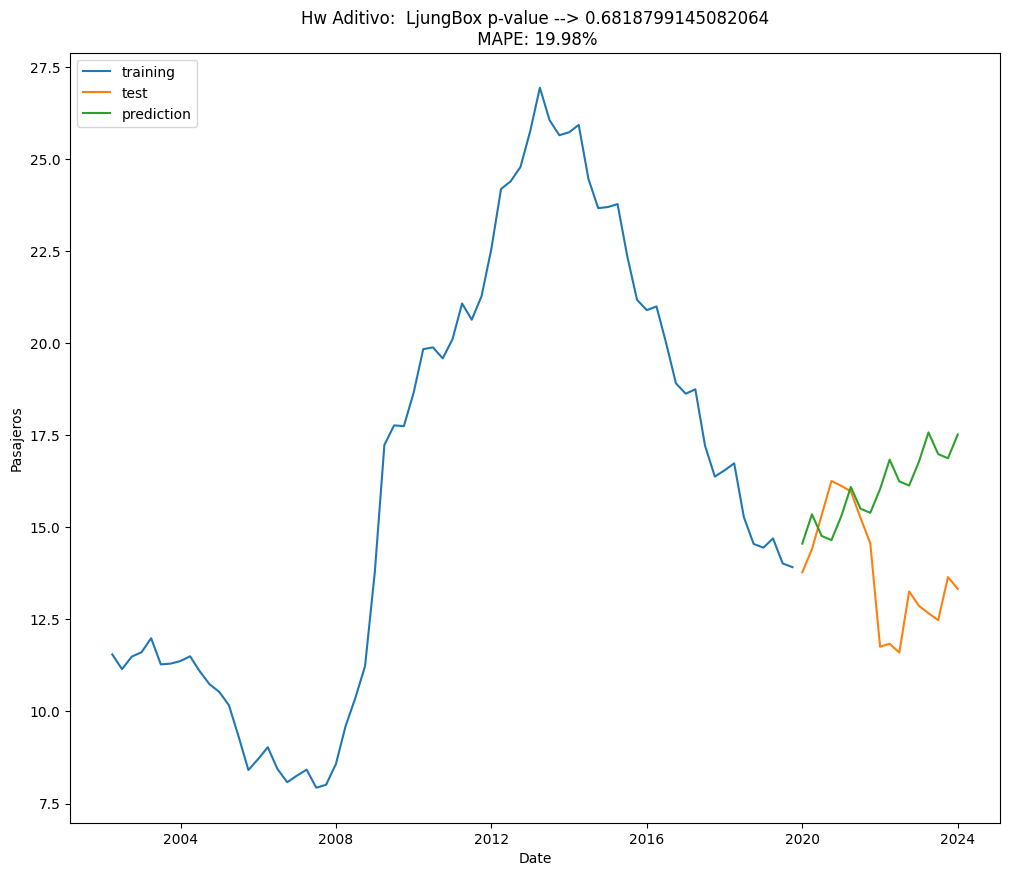

0.6818799145082064


In [162]:
hw_add = ets.ExponentialSmoothing(paroN,trend='add', damped_trend=False, seasonal='add').fit()
hw_add.summary()

eval_model(hw_add,paroN,paro_tstN,'Hw Aditivo')

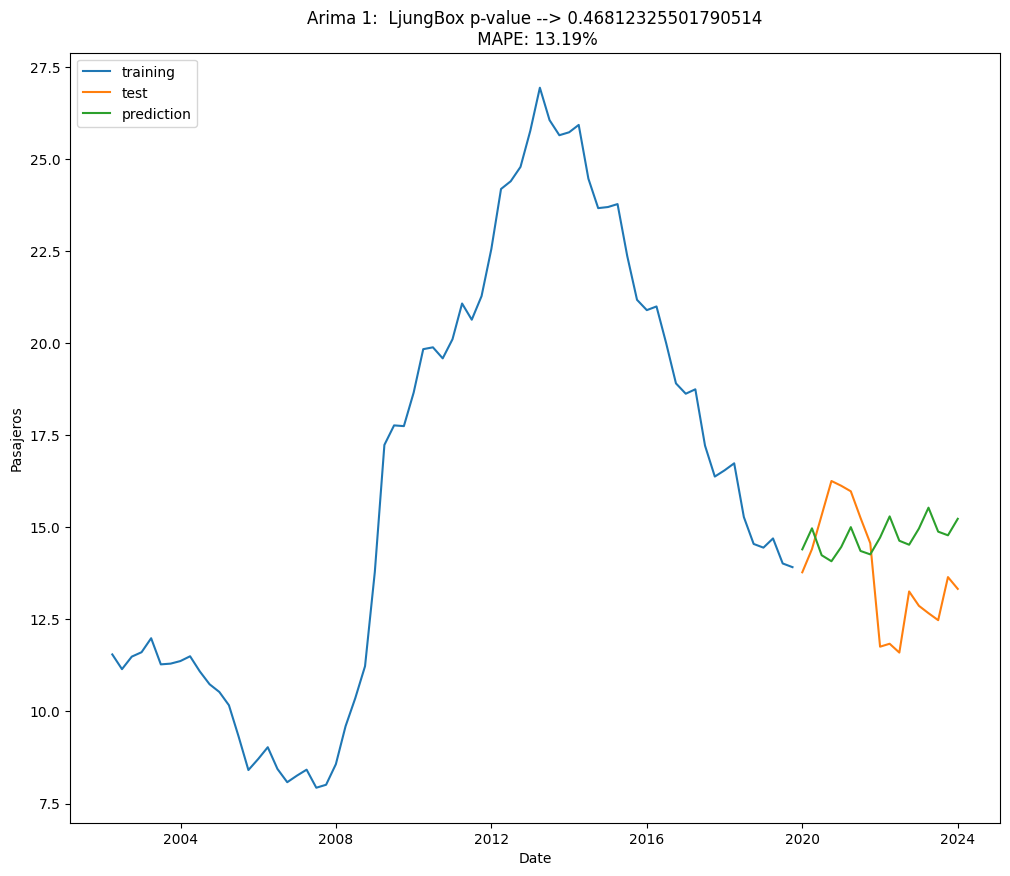

0.46812325501790514


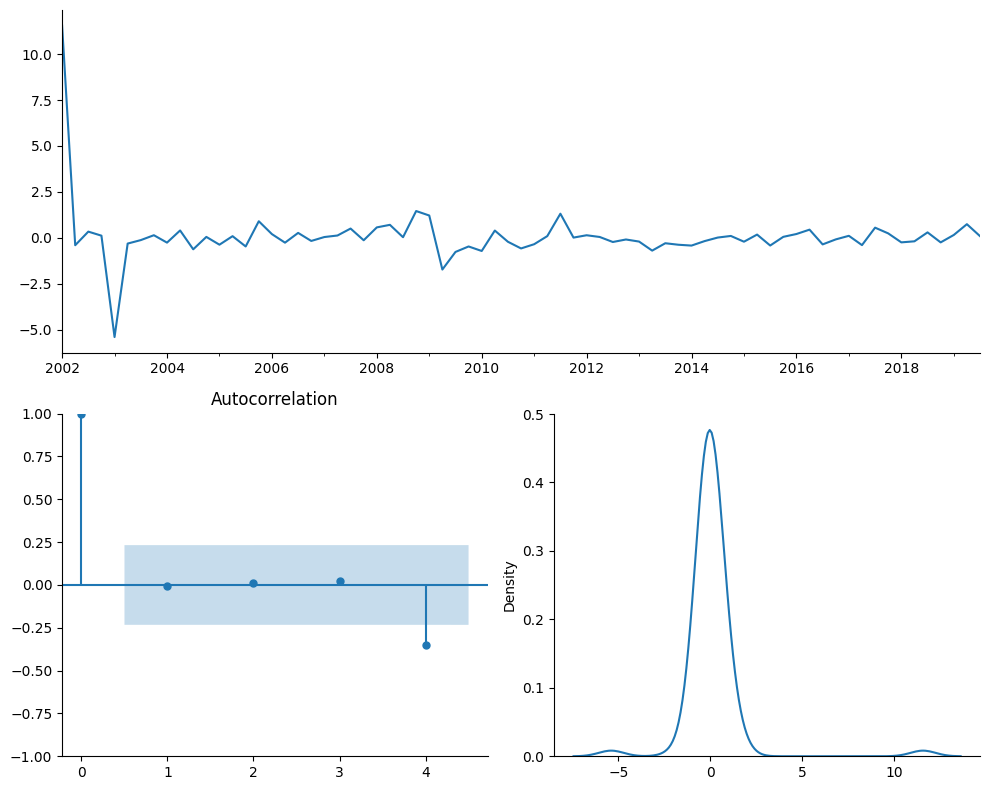

** Mean of the residuals:  0.09

** Ljung Box Test, p-value: 0.743 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [163]:
arima1 = SARIMAX(paroN, 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 0, 4))
  
arima_1 = arima1.fit()

eval_model(arima_1,paroN,paro_tstN,'Arima 1')

residcheck(arima_1.resid,4)

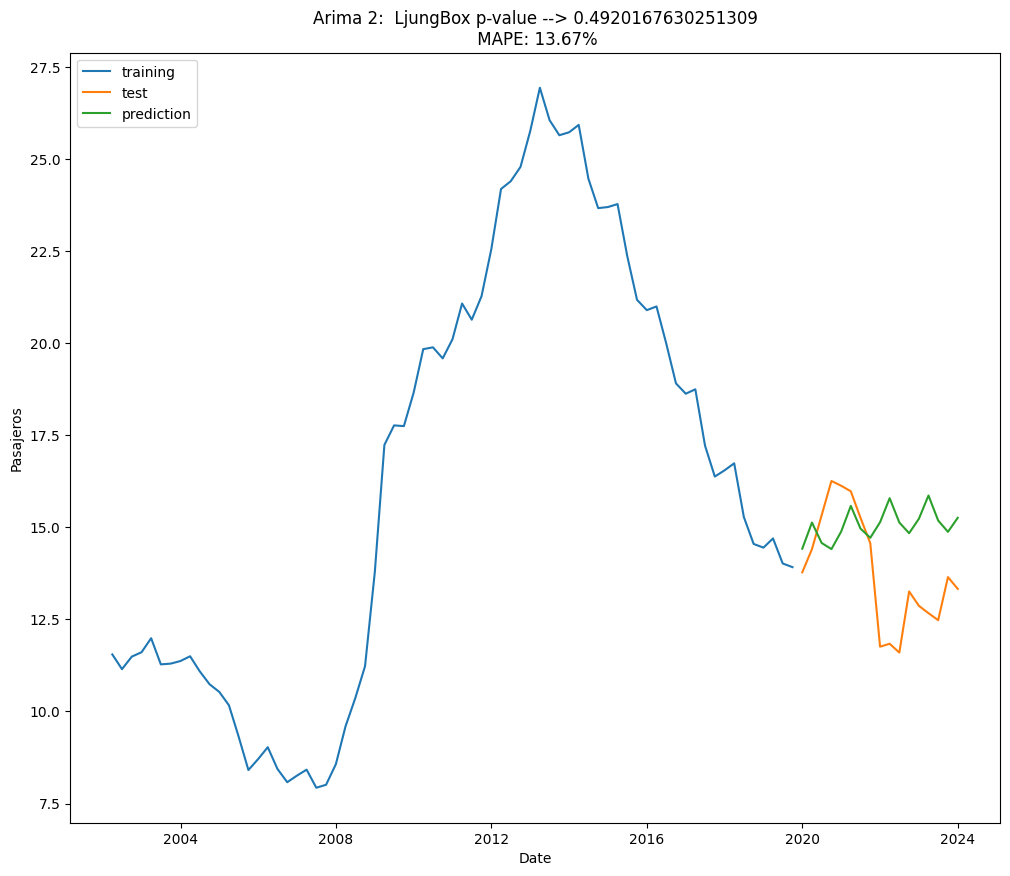

0.4920167630251309


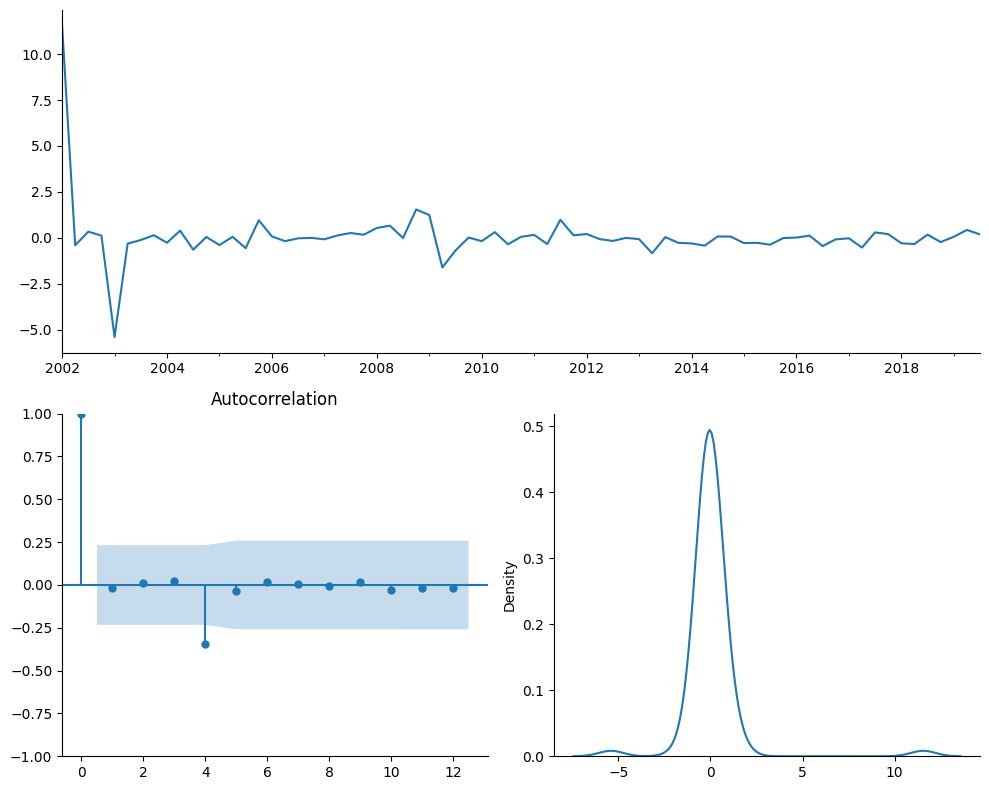

** Mean of the residuals:  0.07

** Ljung Box Test, p-value: 0.492 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [164]:
arima2 = SARIMAX(paroN, 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 1, 4))
  
arima_2 = arima2.fit()

eval_model(arima_2,paroN,paro_tstN,'Arima 2')

residcheck(arima_2.resid,12)

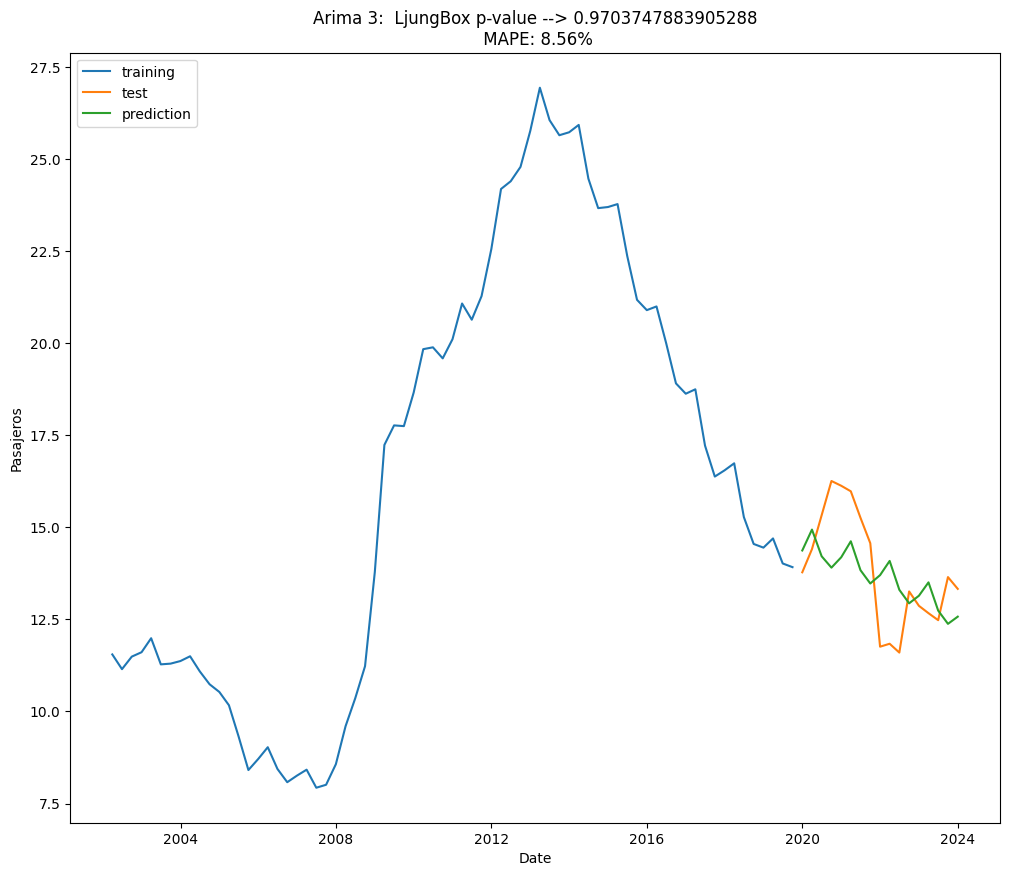

0.9703747883905288


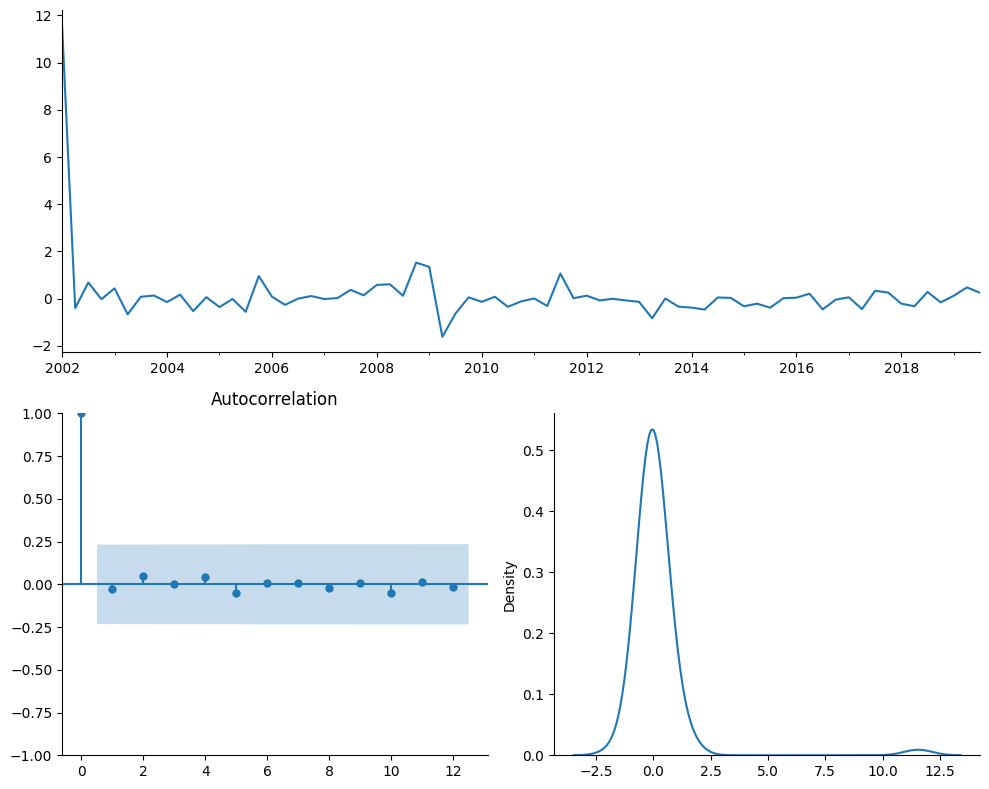

** Mean of the residuals:  0.16

** Ljung Box Test, p-value: 0.97 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [165]:
arima3 = SARIMAX(paroN, 
                order = (1, 1, 0), 
                seasonal_order =(1, 0, 1, 4))
  
arima_3 = arima3.fit()

eval_model(arima_3,paroN,paro_tstN,'Arima 3')

residcheck(arima_3.resid,12)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,0,1)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=177.940, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=123.753, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=142.725, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=178.743, Time=0.01 sec
 ARIMA(1,2,0)(2,0,0)[4]             : AIC=118.309, Time=0.05 sec
 ARIMA(1,2,0)(2,0,1)[4]             : AIC=111.108, Time=0.12 sec
 ARIMA(1,2,0)(1,0,1)[4]             : AIC=109.154, Time=0.07 sec
 ARIMA(1,2,0)(0,0,1)[4]             : AIC=149.581, Time=0.03 sec
 ARIMA(1,2,0)(1,0,2)[4]             : AIC=111.078, Time=0.09 sec
 ARIMA(1,2,0)(0,0,2)[4]             : AIC=142.526, Time=0.04 sec
 ARIMA(1,2,0)(2,0,2)[4]             : AIC=113.152, Time=0.16 sec
 ARIMA(0,2,0)(1,0,1)[4]             : AIC=107.699, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[4]             : AIC=149.273, Time=0.02 sec
 ARIMA(0,2,0)(1,0,0)[4]             : AIC=122.140, 

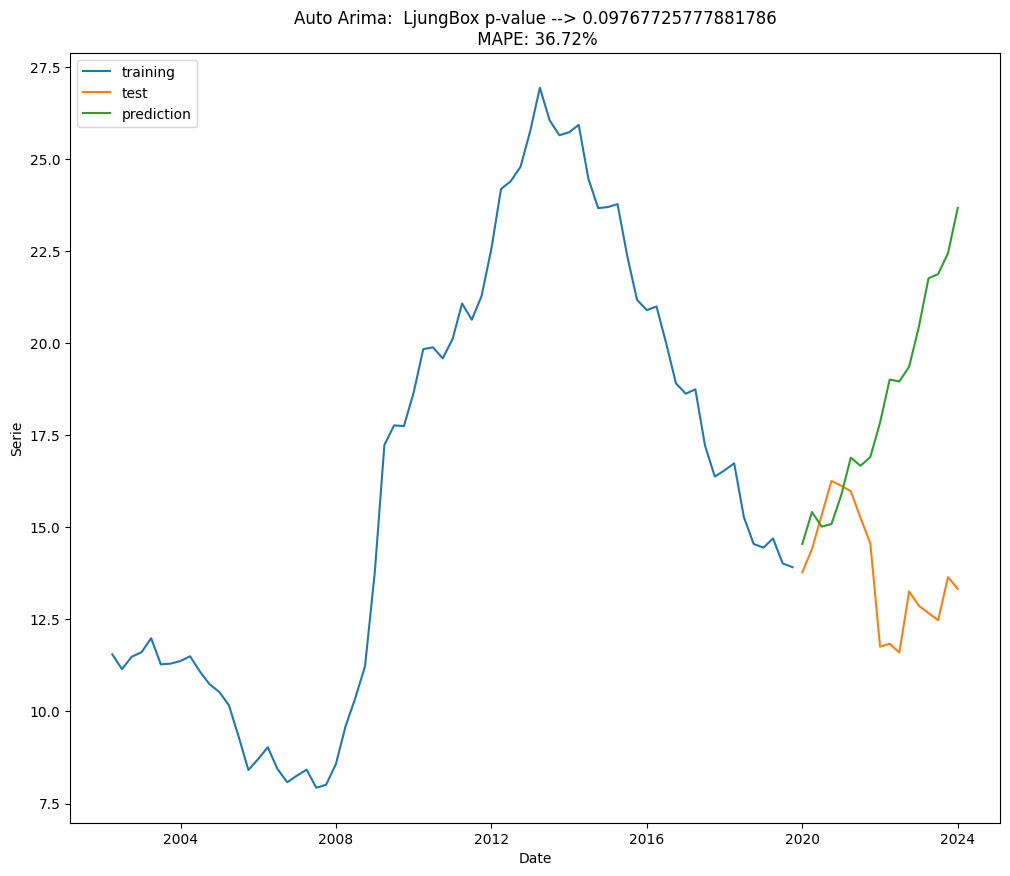

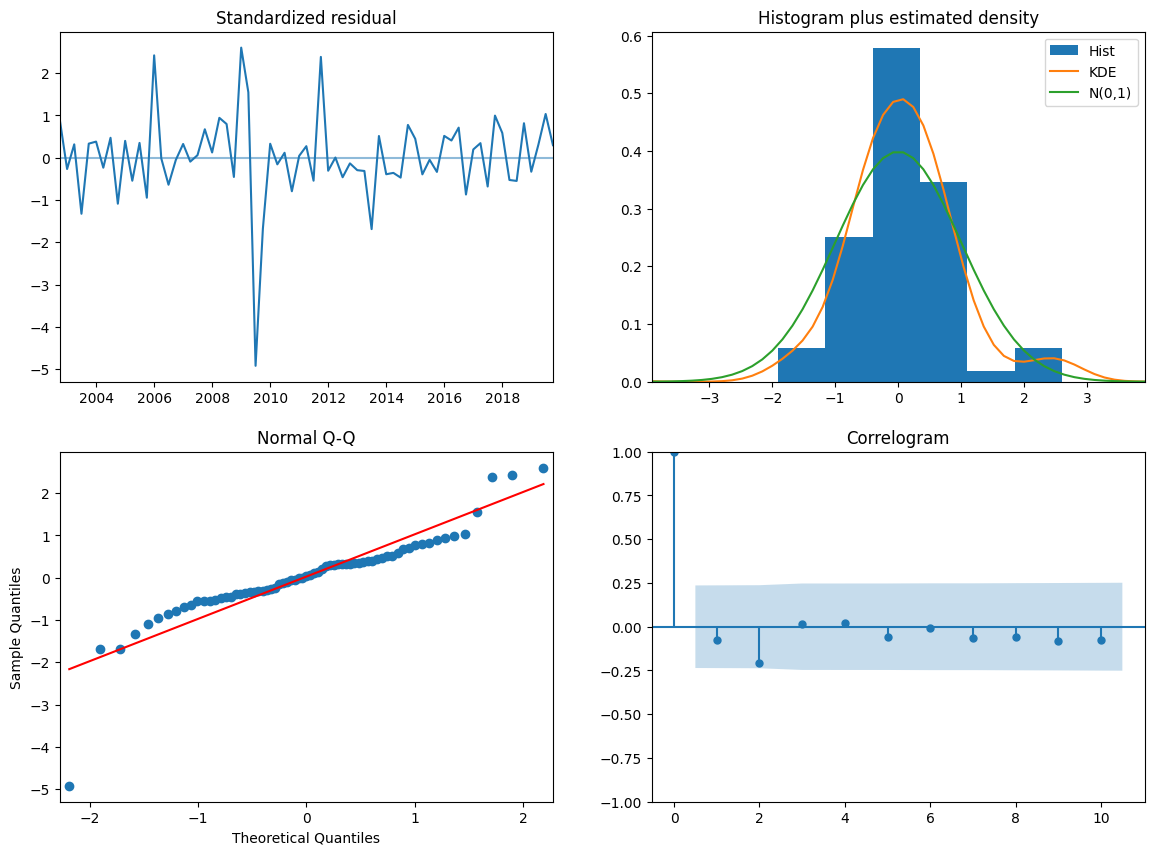

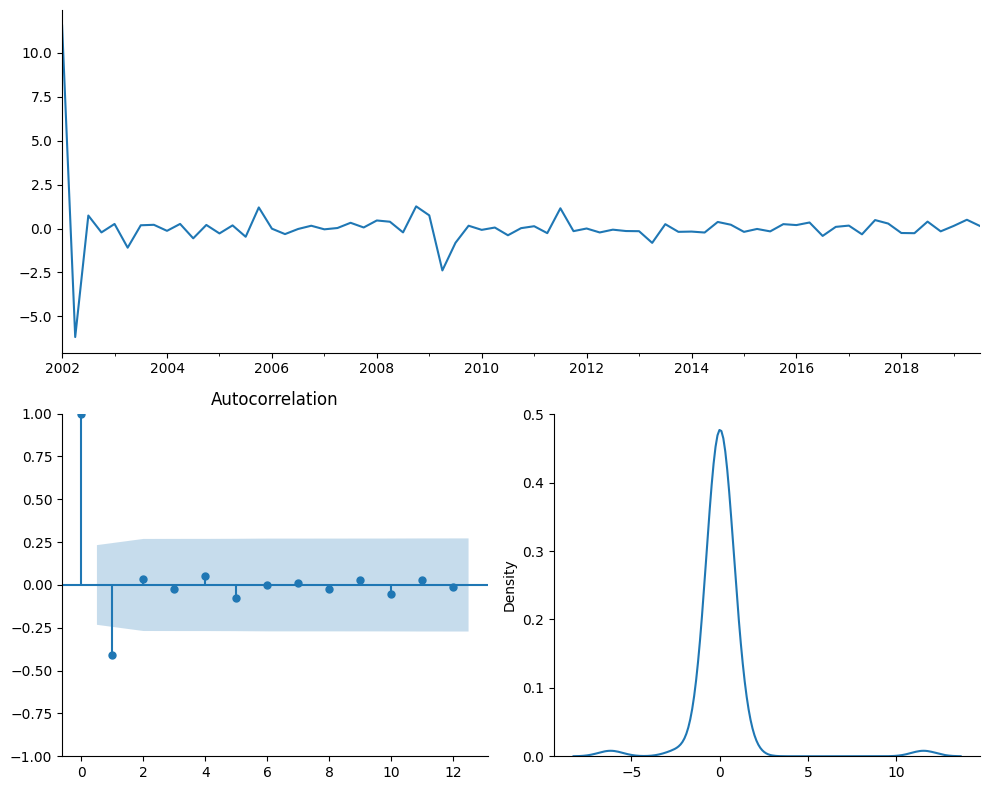

** Mean of the residuals:  0.09

** Ljung Box Test, p-value: 0.098 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [166]:
# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(paroN, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=4,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

eval_model_Aarima(arima_auto,paroN,paro_tstN,'Auto Arima')
residcheck(arima_auto.resid(),12)

Las mejores predicciones para el test son las dadas por el modelo HW aditivo para estos datos, seguido muy de cerca (apenas diferencia) por el Arima 2 que tenía partes AR y MA estacionales. 

In [159]:
# Lectura de datos
paro_tst_2023 = pd.read_excel(r'C:\Users\Guille\Documents\Material Minería de Datos 2023_2024\Materíal Minería de Datos 2023_24_Gr3\Datos\Paro_2022_23.xlsx')
paro_tst_2023.head()

Total Nacional  01 Andalucía  02 Aragón  \
0  2023T4           11.76         17.60       7.85   
1  2023T3           11.84         18.67       7.77   
2  2023T2           11.60         18.05       8.59   
3  2023T1           13.26         18.31       8.94   
4  2022T4           12.87         19.00       9.41   

   03 Asturias, Principado de  04 Balears, Illes  05 Canarias  06 Cantabria  \
0                       11.81              11.38        16.19          7.48   
1                       13.09               5.72        15.23          7.48   
2                       10.45               7.15        15.25          8.12   
3                       13.06              18.14        17.17          9.29   
4                       14.39              10.91        14.57         10.34   

   07 Castilla y León  08 Castilla - La Mancha  ...  10 Comunitat Valenciana  \
0                9.50                    12.45  ...                    12.65   
1                9.47                    11.85  ...                    11.79   
2                9.06                    13.01  ...                    12.20   
3               10.28                    15.02  ...                    13.78   
4                8.83                    14.38  ...                    13.53   

   11 Extremadura  12 Galicia  13 Madrid, Comunidad de  14 Murcia, Región de  \
0           16.29        9.15                     9.72                 11.32   
1           16.50        9.29                    10.53                 13.39   
2           17.05        9.58                     9.56                 12.35   
3           19.53       10.90                    11.01                 13.48   
4           17.62       10.63                    11.51                 12.89   

   15 Navarra, Comunidad Foral de  16 País Vasco  17 Rioja, La  18 Ceuta  \
0                            9.32           6.33          9.52     28.35   
1                            9.29           8.32          9.61     27.79   
2                            8.79           7.13          7.46     27.37   
3                           12.13           8.44         10.06     23.97   
4                           10.09           8.66          8.60     30.55   

   19 Melilla  
0       27.42  
1       20.89  
2       19.42  
3       26.06  
4       21.20  

[5 rows x 21 columns]

In [160]:
dates = pd.date_range(start='2021-12-31', periods=paro_tst_2023.shape[0], freq='Q')
dates

# Convertir en serie temporal
paro_tst_2023.set_index(dates,inplace=True)
paro_tst_2023 = paro_tst_2023.drop([' '],axis=1)
paro_tst_2023

Total Nacional  01 Andalucía  02 Aragón  \
2021-12-31           11.76         17.60       7.85   
2022-03-31           11.84         18.67       7.77   
2022-06-30           11.60         18.05       8.59   
2022-09-30           13.26         18.31       8.94   
2022-12-31           12.87         19.00       9.41   
2023-03-31           12.67         18.98       9.08   
2023-06-30           12.48         18.68       8.96   
2023-09-30           13.65         19.43      10.14   
2023-12-31           13.33         20.18       9.02   

            03 Asturias, Principado de  04 Balears, Illes  05 Canarias  \
2021-12-31                       11.81              11.38        16.19   
2022-03-31                       13.09               5.72        15.23   
2022-06-30                       10.45               7.15        15.25   
2022-09-30                       13.06              18.14        17.17   
2022-12-31                       14.39              10.91        14.57   
2023-03-31                       12.81               5.79        17.73   
2023-06-30                       11.36               9.29        17.76   
2023-09-30                       11.97              18.03        20.30   
2023-12-31                       10.01              14.90        18.94   

            06 Cantabria  07 Castilla y León  08 Castilla - La Mancha  \
2021-12-31          7.48                9.50                    12.45   
2022-03-31          7.48                9.47                    11.85   
2022-06-30          8.12                9.06                    13.01   
2022-09-30          9.29               10.28                    15.02   
2022-12-31         10.34                8.83                    14.38   
2023-03-31          8.61                8.91                    14.41   
2023-06-30          8.17               10.19                    14.11   
2023-09-30         10.53               11.08                    14.27   
2023-12-31         11.52               10.33                    13.31   

            09 Cataluña  10 Comunitat Valenciana  11 Extremadura  12 Galicia  \
2021-12-31         8.97                    12.65           16.29        9.15   
2022-03-31         8.50                    11.79           16.50        9.29   
2022-06-30         8.44                    12.20           17.05        9.58   
2022-09-30        10.37                    13.78           19.53       10.90   
2022-12-31         9.91                    13.53           17.62       10.63   
2023-03-31         9.31                    13.50           15.85       10.80   
2023-06-30         9.29                    12.81           16.73       11.20   
2023-09-30        10.23                    12.85           18.98       11.44   
2023-12-31        10.16                    14.39           18.94       11.01   

            13 Madrid, Comunidad de  14 Murcia, Región de  \
2021-12-31                     9.72                 11.32   
2022-03-31                    10.53                 13.39   
2022-06-30                     9.56                 12.35   
2022-09-30                    11.01                 13.48   
2022-12-31                    11.51                 12.89   
2023-03-31                    11.33                 14.54   
2023-06-30                    10.18                 12.18   
2023-09-30                    11.85                 13.44   
2023-12-31                    10.12                 12.92   

            15 Navarra, Comunidad Foral de  16 País Vasco  17 Rioja, La  \
2021-12-31                            9.32           6.33          9.52   
2022-03-31                            9.29           8.32          9.61   
2022-06-30                            8.79           7.13          7.46   
2022-09-30                           12.13           8.44         10.06   
2022-12-31                           10.09           8.66          8.60   
2023-03-31                            8.99           8.29          8.03   
2023-06-30                            8.76          

In [170]:
paro_tst = pd.concat([paro,paro_tst,paro_tst_2023])
paro_N=paro_tst['Total Nacional']
paro_N.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 257 entries, 2002-03-31 to 2023-12-31
Series name: Total Nacional
Non-Null Count  Dtype  
--------------  -----  
257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [175]:
paro_N_tr=paro_N[:'2021-12-31']
paro_N_tst=paro_N['2022-03-31':]

paro_N_tst
paro_N_tr

2002-03-31    11.55
2002-06-30    11.15
2002-09-30    11.49
2002-12-31    11.61
2003-03-31    11.99
              ...  
2021-09-30    14.57
2021-12-31    11.76
2021-12-31    11.76
2021-12-31    11.76
2021-12-31    11.76
Name: Total Nacional, Length: 225, dtype: float64

C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\

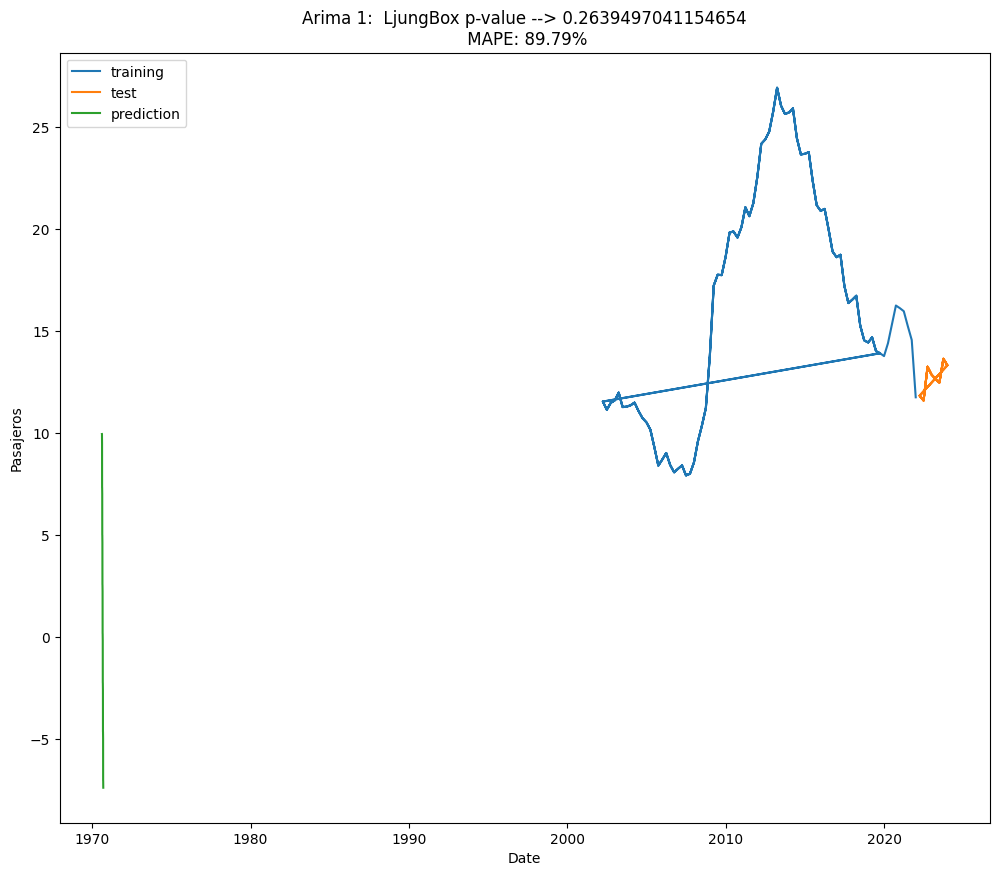

0.2639497041154654


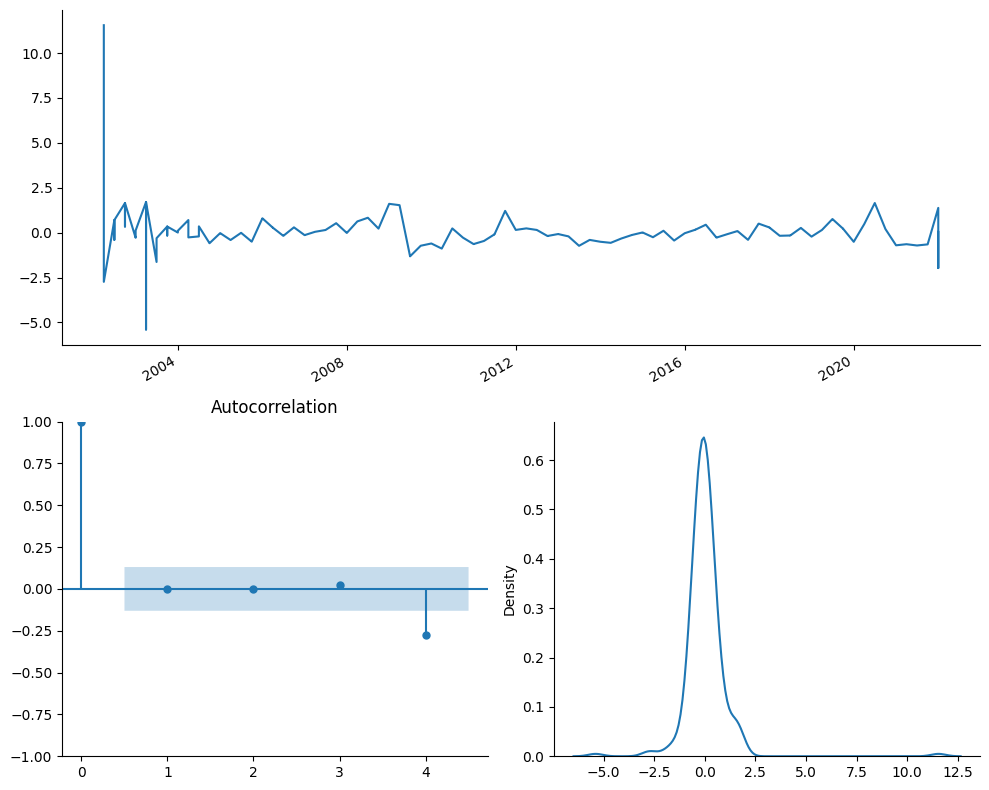

** Mean of the residuals:  0.02

** Ljung Box Test, p-value: 0.744 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [173]:
arima1 = SARIMAX(paro_N_tr, 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 0, 4))
  
arima_1 = arima1.fit()

eval_model(arima_1,paro_N_tr,paro_N_tst,'Arima 1')

residcheck(arima_1.resid,4)

## Datos de defunciones

Otro ejemplo de defunciones.

In [59]:
# Lectura de datos
defun = pd.read_excel('C:\\Users\\Guille\\Documents\\MineriaDatos_2022_23\\Datos\\defunciones.xlsx')
defun

Todas las causas  Tumores  Causas externas
0        1980M01             28681     4883             1277
1        1980M02             23906     4493             1122
2        1980M03             25275     4957             1244
3        1980M04             22500     4523             1214
4        1980M05             22781     4893             1228
..           ...               ...      ...              ...
463      2018M08             33177     9370             1472
464      2018M09             30293     9079             1306
465      2018M10             32879     9629             1275
466      2018M11             34338     9315             1234
467      2018M12             37033     9743             1268

[468 rows x 4 columns]

In [60]:
defun['Month'] = defun.iloc[:,0].apply(lambda x: x.replace('M','-'))
defun.set_index(['Month'],inplace=True)
defun.index=pd.to_datetime(defun.index)
defun.iloc[:,1:]

C:\Users\Guille\AppData\Local\Temp\ipykernel_28500\3185673940.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  defun.index=pd.to_datetime(defun.index)


Todas las causas  Tumores  Causas externas
Month                                                 
1980-01-01             28681     4883             1277
1980-02-01             23906     4493             1122
1980-03-01             25275     4957             1244
1980-04-01             22500     4523             1214
1980-05-01             22781     4893             1228
...                      ...      ...              ...
2018-08-01             33177     9370             1472
2018-09-01             30293     9079             1306
2018-10-01             32879     9629             1275
2018-11-01             34338     9315             1234
2018-12-01             37033     9743             1268

[468 rows x 3 columns]

Results of Dickey-Fuller Test:
Test Statistic                  -0.942604
p-value                          0.773619
#Lags Used                      14.000000
Number of Observations Used    453.000000
Critical Value (1%)             -3.444868
Critical Value (5%)             -2.867941
Critical Value (10%)            -2.570180
dtype: float64


(-0.37339991488447355,
 0.9876512459204007,
 11,
 456,
 {'1%': -3.9787614194731136,
  '5%': -3.4201620043878207,
  '10%': -3.1327392874680067},
 6017.453227012797)

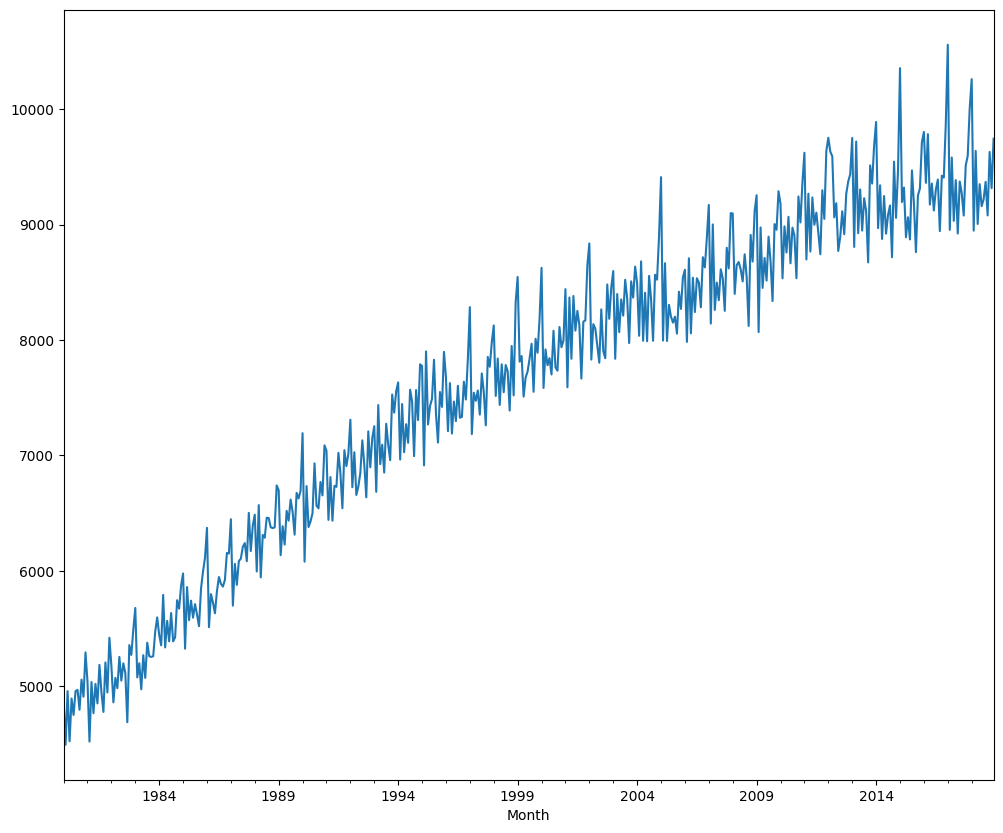

In [61]:
defun['Tumores'].plot()
test_stationarity(defun['Todas las causas'])
adfuller(defun['Tumores'], regression='ct')

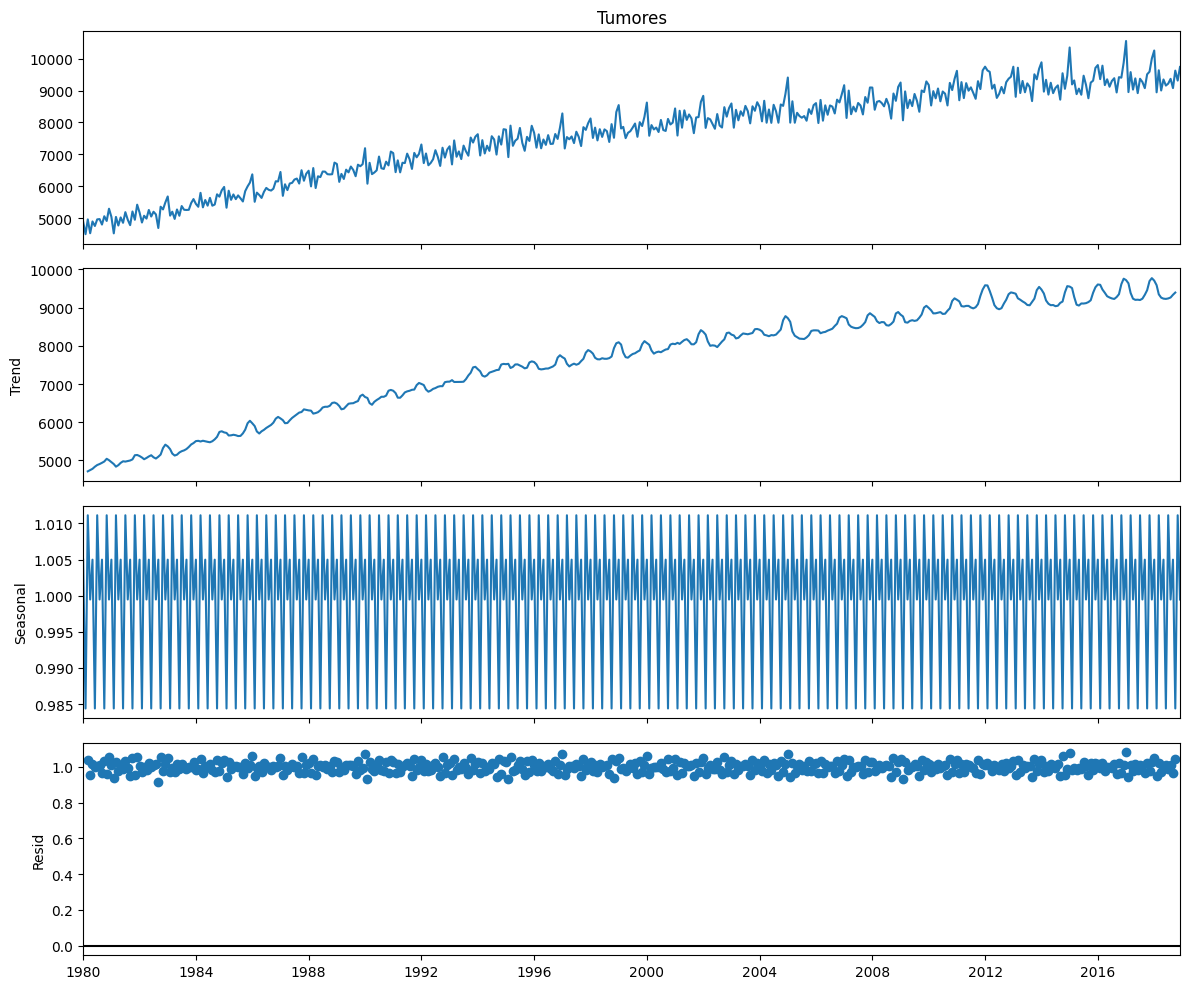

In [62]:
def_ext_desc_Mul = seasonal_decompose(defun['Tumores'], model='multiplicative',period=4)
def_ext_desc_Mul.plot()
plt.show()

<AxesSubplot: xlabel='Month'>

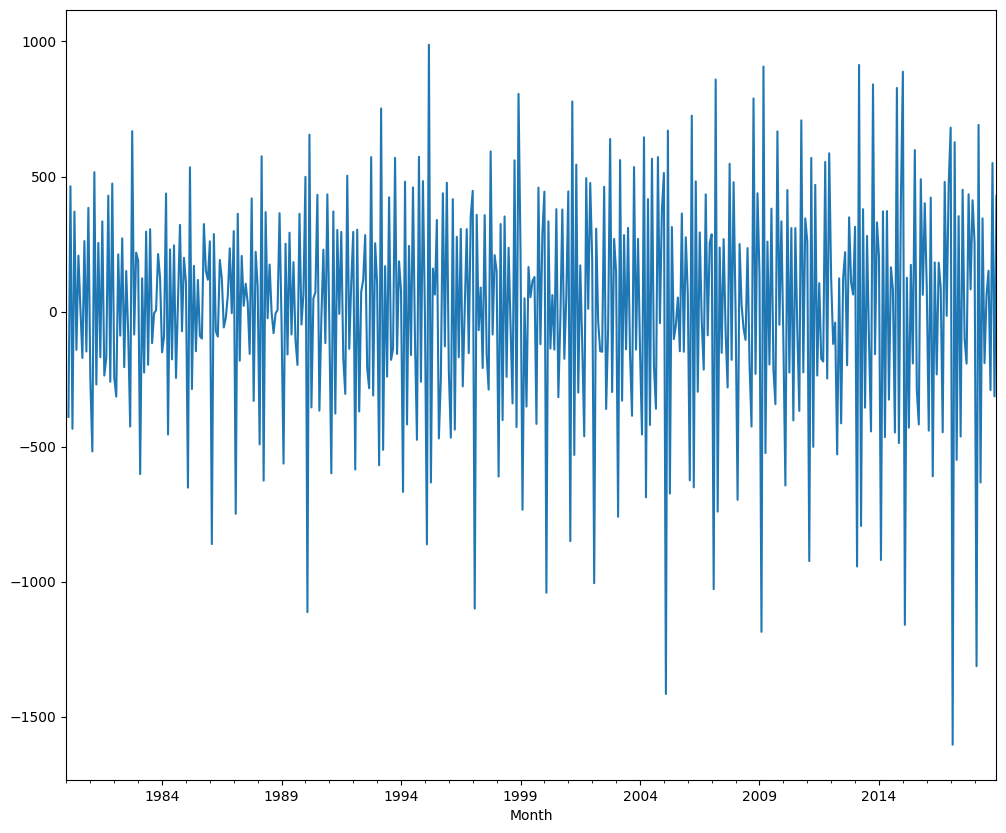

In [63]:
def_tum_diff = defun['Tumores'].diff(periods=1)
def_tum_diff.plot()

In [64]:
# Generamos la serie logaritmica
tumLog = defun['Tumores'].copy()
tumLog

Month
1980-01-01    4883
1980-02-01    4493
1980-03-01    4957
1980-04-01    4523
1980-05-01    4893
              ... 
2018-08-01    9370
2018-09-01    9079
2018-10-01    9629
2018-11-01    9315
2018-12-01    9743
Name: Tumores, Length: 468, dtype: int64

In [65]:
tumLog = np.log(tumLog)


<AxesSubplot: xlabel='Month'>

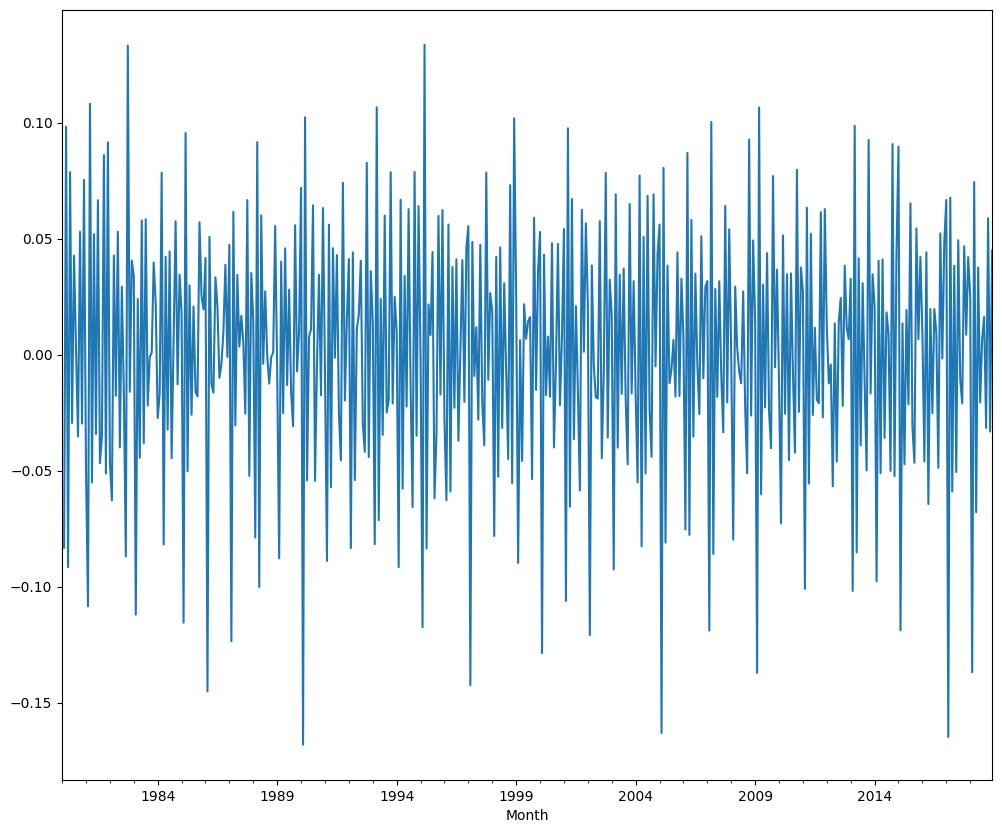

In [66]:
tumLog_diff = tumLog.diff(periods=1)

tumLog_diff.plot()

In [67]:
test_stationarity(tumLog_diff.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -4.319989
p-value                          0.000410
#Lags Used                      18.000000
Number of Observations Used    448.000000
Critical Value (1%)             -3.445031
Critical Value (5%)             -2.868013
Critical Value (10%)            -2.570218
dtype: float64


In [68]:
tumLog_diff12 = tumLog_diff.diff(periods=12)

In [69]:
test_stationarity(tumLog_diff12.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.000587e+01
p-value                        1.832186e-17
#Lags Used                     1.800000e+01
Number of Observations Used    4.360000e+02
Critical Value (1%)           -3.445438e+00
Critical Value (5%)           -2.868192e+00
Critical Value (10%)          -2.570313e+00
dtype: float64


<AxesSubplot: xlabel='Month'>

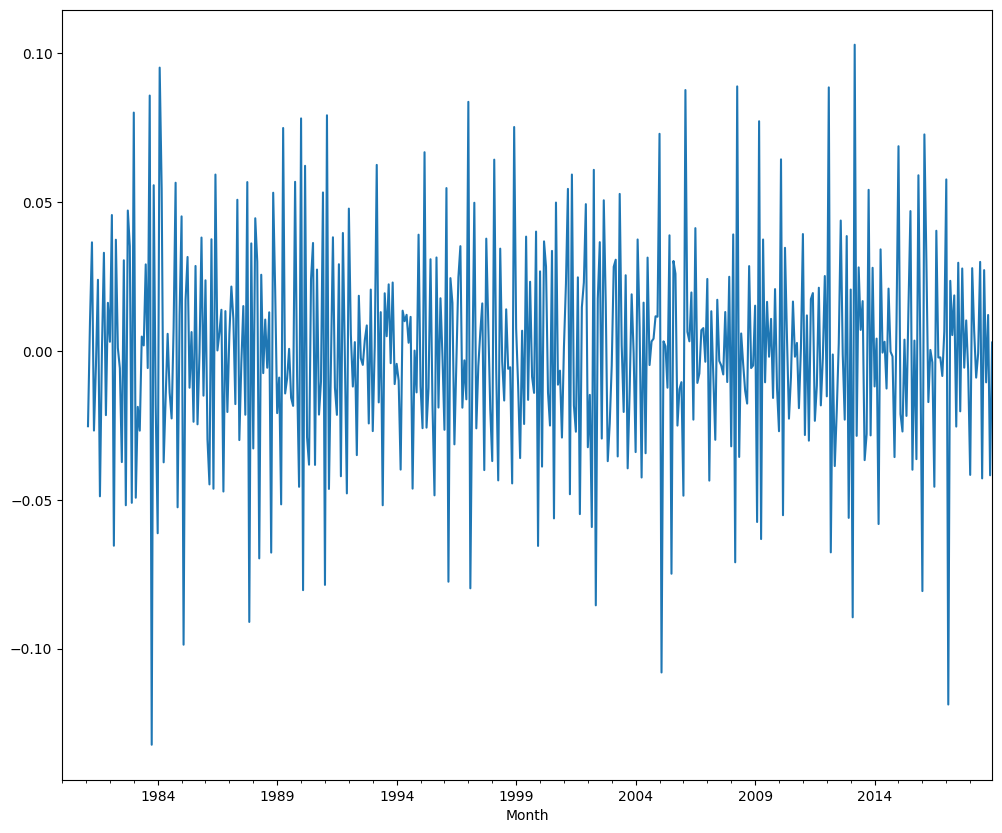

In [70]:
tumLog_diff12.plot()

In [71]:

hw_mul = ets.ExponentialSmoothing(defun['Tumores'],trend='mul', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

#eval_model(hw_mul,defun['Tumores'],defun['Tumores'],'Hw Multiplicativo')

C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                  Tumores   No. Observations:                  468
Model:             ExponentialSmoothing   SSE                       10854326.208
Optimized:                         True   AIC                           4736.152
Trend:                   Multiplicative   BIC                           4802.527
Seasonal:                Multiplicative   AICC                          4737.675
Seasonal Periods:                    12   Date:                 Sat, 24 Feb 2024
Box-Cox:                          False   Time:                         11:37:27
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464286                alpha                 True
smoothing_trend               0.0266234                 beta                 True
smoothing_seasonal            0.1313187                gamma                 True
initial_level                 4869.9250                  l.0                 True
initial_trend                 1.0049660                  b.0                 True
initial_seasons.0             1.0540960                  s.0                 True
initial_seasons.1             0.9552791                  s.1                 True
initial_seasons.2             1.0197235                  s.2                 True
initial_seasons.3             0.9634935                  s.3                 True
initial_seasons.4             1.0113644                  s.4                 True
initial_seasons.5             0.9813007                  s.5                 True
initial_seasons.6             1.0205258                  s.6                 True
initial_seasons.7             0.9966131                  s.7                 True
initial_seasons.8             0.9671268                  s.8                 True
initial_seasons.9             1.0226587                  s.9                 True
initial_seasons.10            1.0063375                 s.10                 True
initial_seasons.11            1.0578165                 s.11                 True
---------------------------------------------------------------------------------
"""

In [72]:
tum_tr = defun[:'2014-12-01']
tum_ts = defun['2015-01-01':]
tum_ts

Todas las causas  Tumores  Causas externas
Month                                                              
2015-01-01      2015M01             47269    10355             1360
2015-02-01      2015M02             42464     9195             1227
2015-03-01      2015M03             38987     9320             1359
2015-04-01      2015M04             33686     8890             1141
2015-05-01      2015M05             32706     9063             1226
2015-06-01      2015M06             31078     8871             1183
2015-07-01      2015M07             35628     9469             1471
2015-08-01      2015M08             31220     9179             1327
2015-09-01      2015M09             28863     8761             1221
2015-10-01      2015M10             31898     9251             1168
2015-11-01      2015M11             32346     9313             1115
2015-12-01      2015M12             36423     9714             1281
2016-01-01      2016M01             38334     9802             1353
2016-02-01      2016M02             35548     9361             1279
2016-03-01      2016M03             38198     9783             1318
2016-04-01      2016M04             33707     9173             1202
2016-05-01      2016M05             33001     9355             1295
2016-06-01      2016M06             31512     9122             1294
2016-07-01      2016M07             32961     9303             1413
2016-08-01      2016M08             32248     9390             1394
2016-09-01      2016M09             30095     8943             1256
2016-10-01      2016M10             32060     9423             1317
2016-11-01      2016M11             33759     9407             1190
2016-12-01      2016M12             39188     9877             1357
2017-01-01      2017M01             49370    10558             1453
2017-02-01      2017M02             37434     8954             1251
2017-03-01      2017M03             35779     9581             1257
2017-04-01      2017M04             33208     9032             1207
2017-05-01      2017M05             33673     9385             1235
2017-06-01      2017M06             32236     8922             1330
2017-07-01      2017M07             31924     9373             1418
2017-08-01      2017M08             32356     9271             1440
2017-09-01      2017M09             30049     9078             1281
2017-10-01      2017M10             32680     9512             1323
2017-11-01      2017M11             34149     9594             1244
2017-12-01      2017M12             41665    10006             1398
2018-01-01      2018M01             47911    10260             1424
2018-02-01      2018M02             39756     8947             1257
2018-03-01      2018M03             39772     9638             1347
2018-04-01      2018M04             34956     9005             1257
2018-05-01      2018M05             33421     9350             1311
2018-06-01      2018M06             31970     9159             1241
2018-07-01      2018M07             32215     9219             1376
2018-08-01      2018M08             33177     9370             1472
2018-09-01      2018M09             30293     9079             1306
2018-10-01      2018M10             32879     9629             1275
2018-11-01      2018M11             34338     9315             1234
2018-12-01      2018M12             37033     9743             1268

In [73]:
hw_mul = ets.ExponentialSmoothing(tum_tr['Tumores'],trend='mul', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                  Tumores   No. Observations:                  420
Model:             ExponentialSmoothing   SSE                        9114668.046
Optimized:                         True   AIC                           4225.759
Trend:                   Multiplicative   BIC                           4290.403
Seasonal:                Multiplicative   AICC                          4227.465
Seasonal Periods:                    12   Date:                 Sat, 24 Feb 2024
Box-Cox:                          False   Time:                         11:37:27
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464286                alpha                 True
smoothing_trend               0.0266234                 beta                 True
smoothing_seasonal            0.0984890                gamma                 True
initial_level                 4869.9250                  l.0                 True
initial_trend                 1.0050384                  b.0                 True
initial_seasons.0             1.0615795                  s.0                 True
initial_seasons.1             0.9593845                  s.1                 True
initial_seasons.2             1.0241466                  s.2                 True
initial_seasons.3             0.9686278                  s.3                 True
initial_seasons.4             1.0114054                  s.4                 True
initial_seasons.5             0.9825812                  s.5                 True
initial_seasons.6             1.0205549                  s.6                 True
initial_seasons.7             0.9993394                  s.7                 True
initial_seasons.8             0.9690714                  s.8                 True
initial_seasons.9             1.0267895                  s.9                 True
initial_seasons.10            1.0091831                 s.10                 True
initial_seasons.11            1.0578629                 s.11                 True
---------------------------------------------------------------------------------
"""

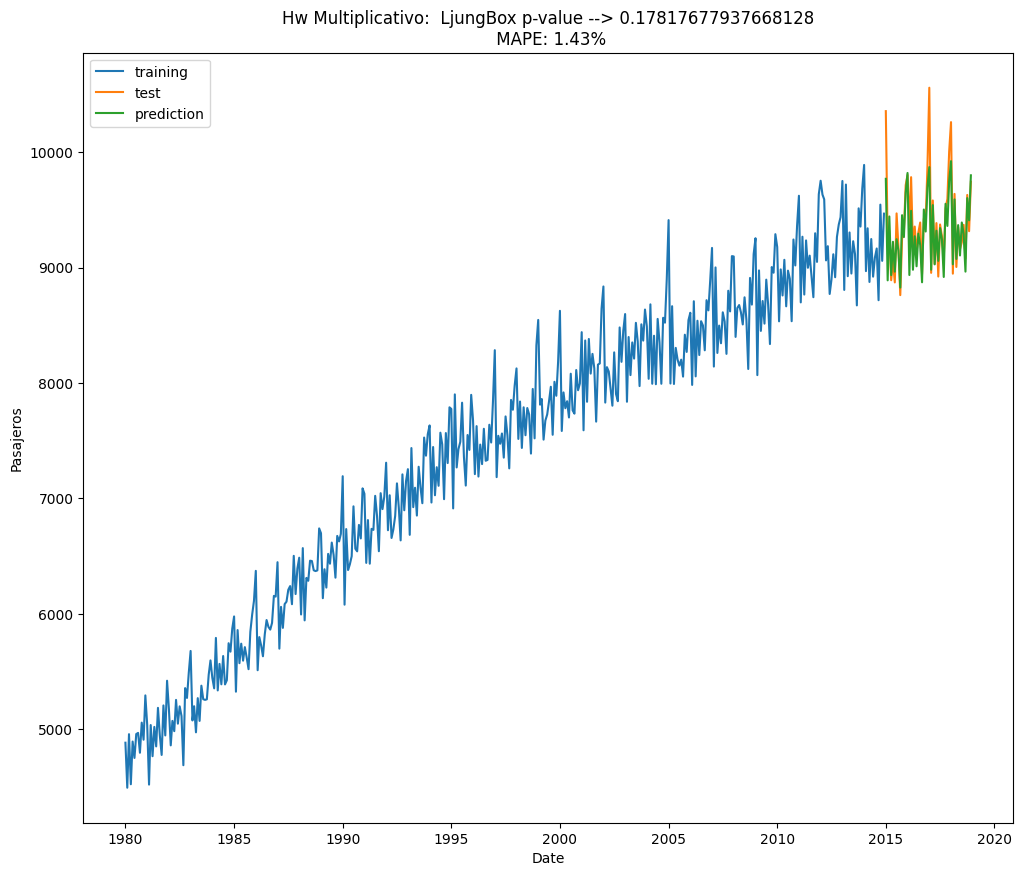

0.17817677937668128


In [74]:
eval_model(hw_mul,tum_tr['Tumores'],tum_ts['Tumores'],'Hw Multiplicativo')

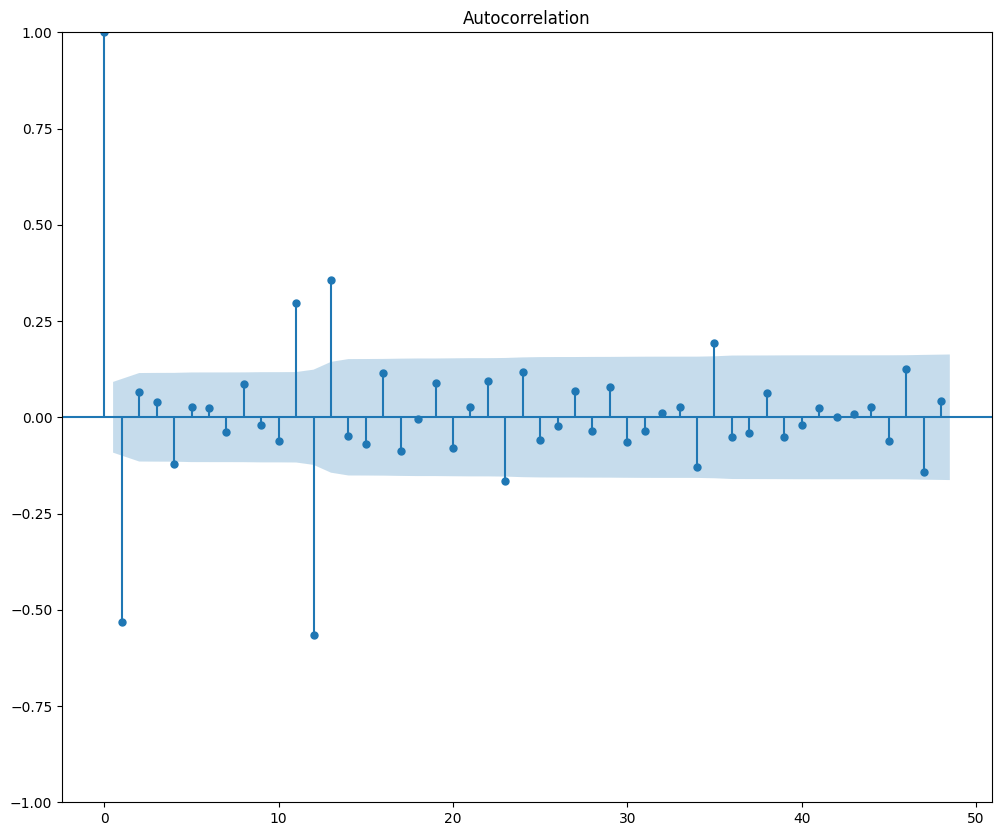

In [75]:
plot_acf(tumLog_diff12.dropna(inplace=False), lags=48)
plt.show()

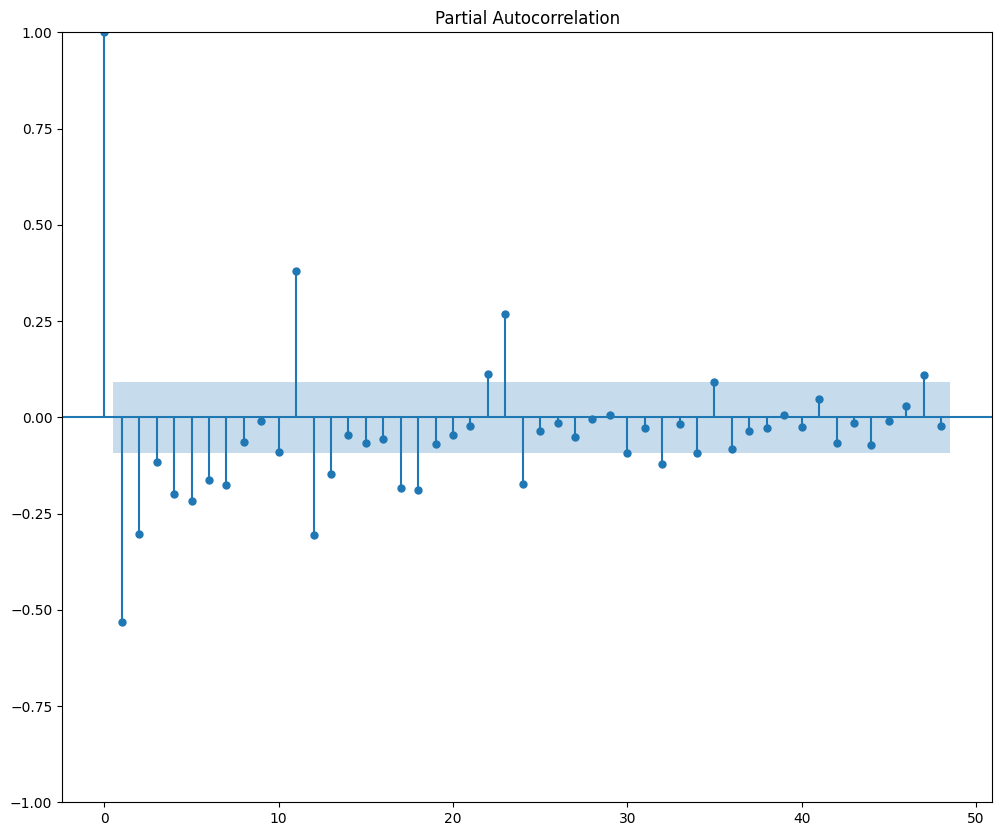

In [76]:
plot_pacf(tumLog_diff12.dropna(inplace=False),lags=48,method='ywm')
plt.show()

C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Guille\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


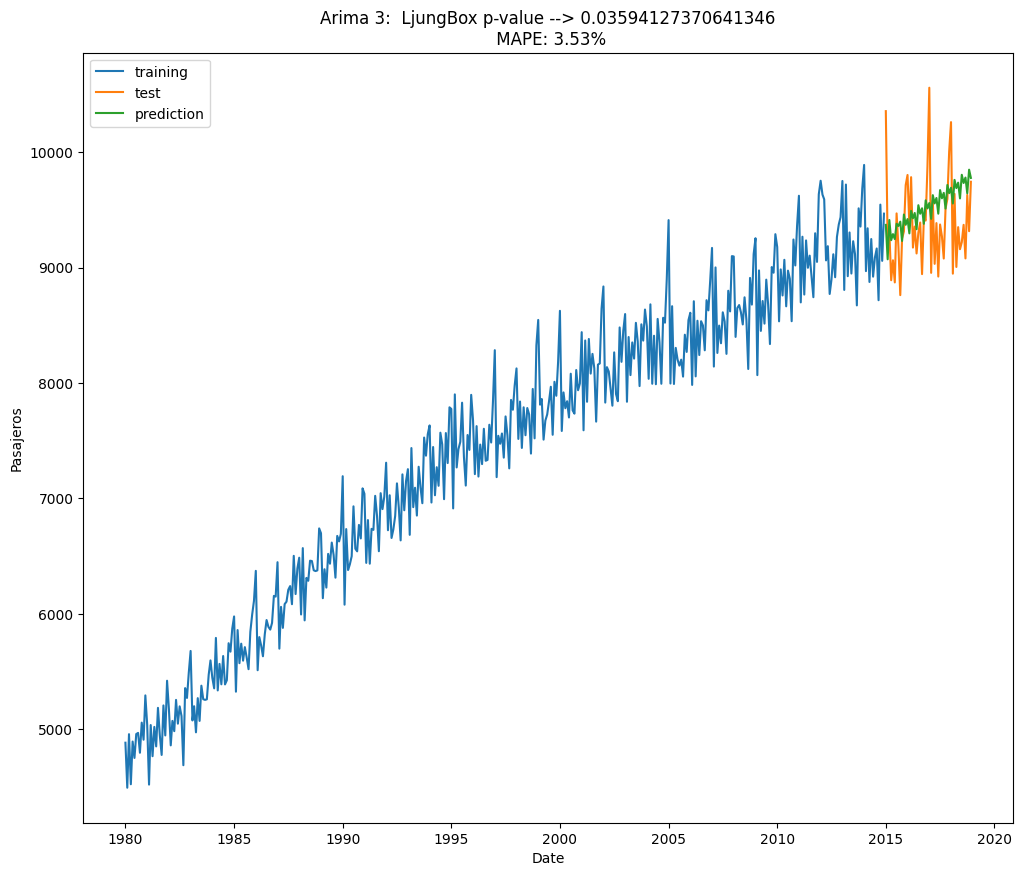

0.03594127370641346


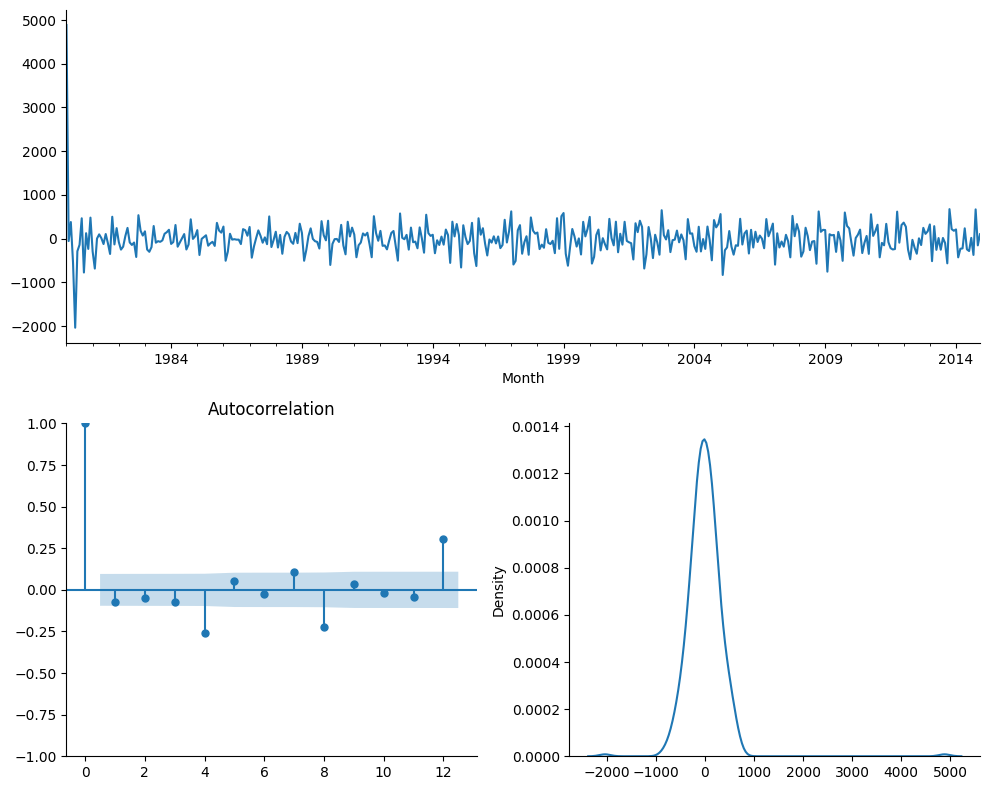

** Mean of the residuals:  -5.17

** Ljung Box Test, p-value: 0.036 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot: xlabel='Month'>,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: ylabel='Density'>)

In [77]:
arima3 = SARIMAX(tum_tr['Tumores'], 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 1, 4))
  
arima_3 = arima3.fit()

eval_model(arima_3,tum_tr['Tumores'],tum_ts['Tumores'],'Arima 3')

residcheck(arima_3.resid,12)

In [78]:
# Lectura de datos
vuelos = pd.read_excel('C:\\Users\\Guille\\Documents\\MineriaDatos_2022_23\\Datos\\VUELOS.xlsx')
vuelos

MES  Vuelos
0    1995M01   53180
1    1995M02   48647
2    1995M03   55353
3    1995M04   56751
4    1995M05   59487
..       ...     ...
218  2013M03  101013
219  2013M04  115542
220  2013M05  126659
221  2013M06  128673
222  2013M07  141972

[223 rows x 2 columns]

In [79]:
vuelos['Month'] = vuelos.iloc[:,0].apply(lambda x: x.replace('M','-'))
vuelos.set_index(['Month'],inplace=True)
vuelos.index=pd.to_datetime(vuelos.index)
vuelos.iloc[:,1:]

Vuelos
Month             
1995-01-01   53180
1995-02-01   48647
1995-03-01   55353
1995-04-01   56751
1995-05-01   59487
...            ...
2013-03-01  101013
2013-04-01  115542
2013-05-01  126659
2013-06-01  128673
2013-07-01  141972

[223 rows x 1 columns]

<AxesSubplot: xlabel='Month'>

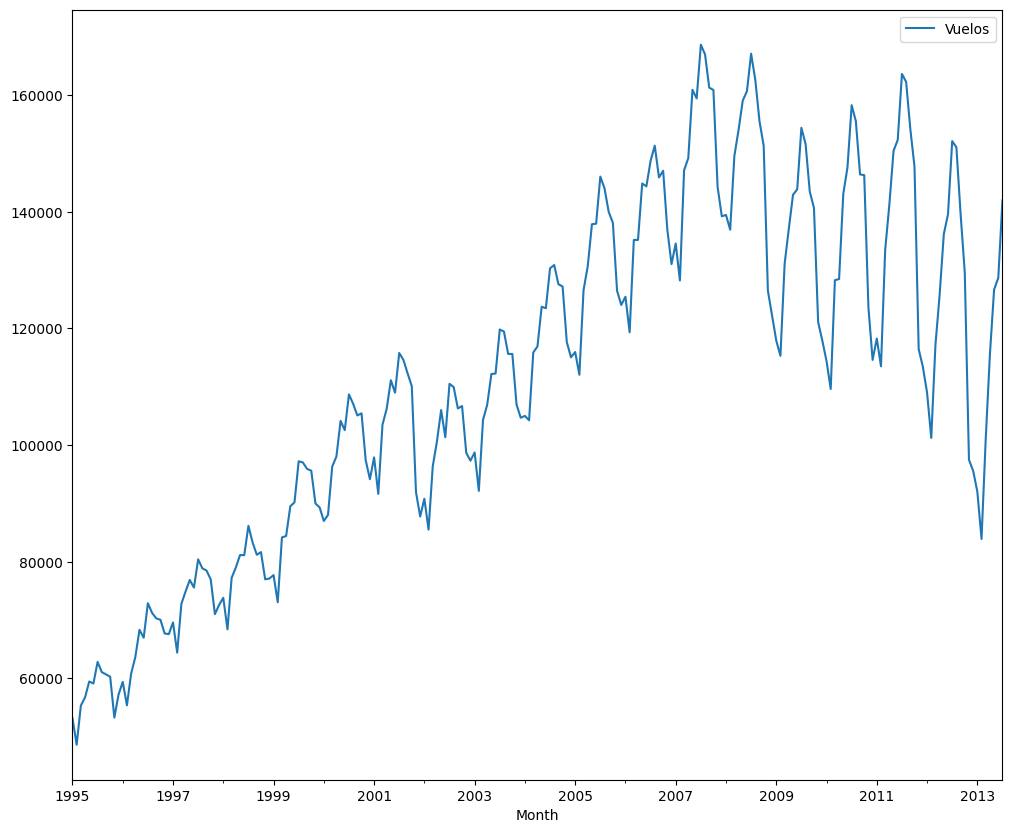

In [80]:
vuelos.plot()